### Importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
#removing the max row & column display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#removing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading of dataset
train = pd.read_csv('CarPrice_data.csv')

In [4]:
train.describe().T #dataset's quick description

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [5]:
train.info() #quick info on columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
train.isnull().sum() #checking for missing data

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
train.duplicated().sum() #checking for duplicates

0

In [8]:
train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Cleaning

In [9]:
train['make'] = [car.split(' ')[0].lower() for car in train.CarName] #create column with the car brand name
train['make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
30           honda
31           honda
32           honda
33           honda
34           honda
35           honda
36           honda
37           honda
38           honda
39           honda
40           honda
41           honda
42           honda
43           isuzu
44           isuzu
45           isuzu
46           isuzu
47          jaguar
48          jaguar
49          jaguar
50           maxda
51           maxda
52          

* I can get a car's make from the car's name

In [10]:
train['make'].unique() #checking to see mistakes in car's make

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

* Notice that there are some entries in the make column with spelling errors. 

In [11]:
#correcting errors in car's make
train.loc[(train['make'] == 'maxda'), 'make'] = 'mazda'
train.loc[(train['make'] == 'porcshce'), 'make'] = 'porsche'
train.loc[(train['make'] == 'toyouta'), 'make'] = 'toyota'
train.loc[(train['make'] == 'vokswagen'), 'make'] = 'volkswagen'
train.loc[(train['make'] == 'vw'), 'make'] = 'volkswagen'
train['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
#adding column that contains the combined mile per gallon of the cars
train['combinedmpg'] = (((train.citympg * 0.55) + (train.highwaympg * 0.45))/2).astype(int) #the combinedmpg is a weighted average
train.combinedmpg

0      11
1      11
2      11
3      13
4       9
5      10
6      10
7      10
8       9
9       9
10     12
11     12
12     12
13     12
14     11
15      9
16      9
17      8
18     24
19     20
20     20
21     19
22     17
23     13
24     17
25     17
26     17
27     13
28     13
29     10
30     25
31     17
32     19
33     15
34     15
35     15
36     15
37     14
38     14
39     14
40     14
41     12
42     13
43     13
44     20
45     20
46     13
47      8
48      8
49      7
50     15
51     17
52     17
53     17
54     17
55      9
56      9
57      9
58      9
59     14
60     14
61     14
62     14
63     19
64     14
65     11
66     17
67     11
68     11
69     11
70     11
71      8
72      8
73      7
74      7
75     10
76     19
77     17
78     17
79     13
80     13
81     14
82     10
83     10
84     10
85     14
86     14
87     13
88     13
89     16
90     23
91     16
92     16
93     16
94     16
95     16
96     16
97     16
98     16
99     15


## EDA

In [13]:
sns.set_style('darkgrid') #setting visualization colors

<AxesSubplot:xlabel='make', ylabel='count'>

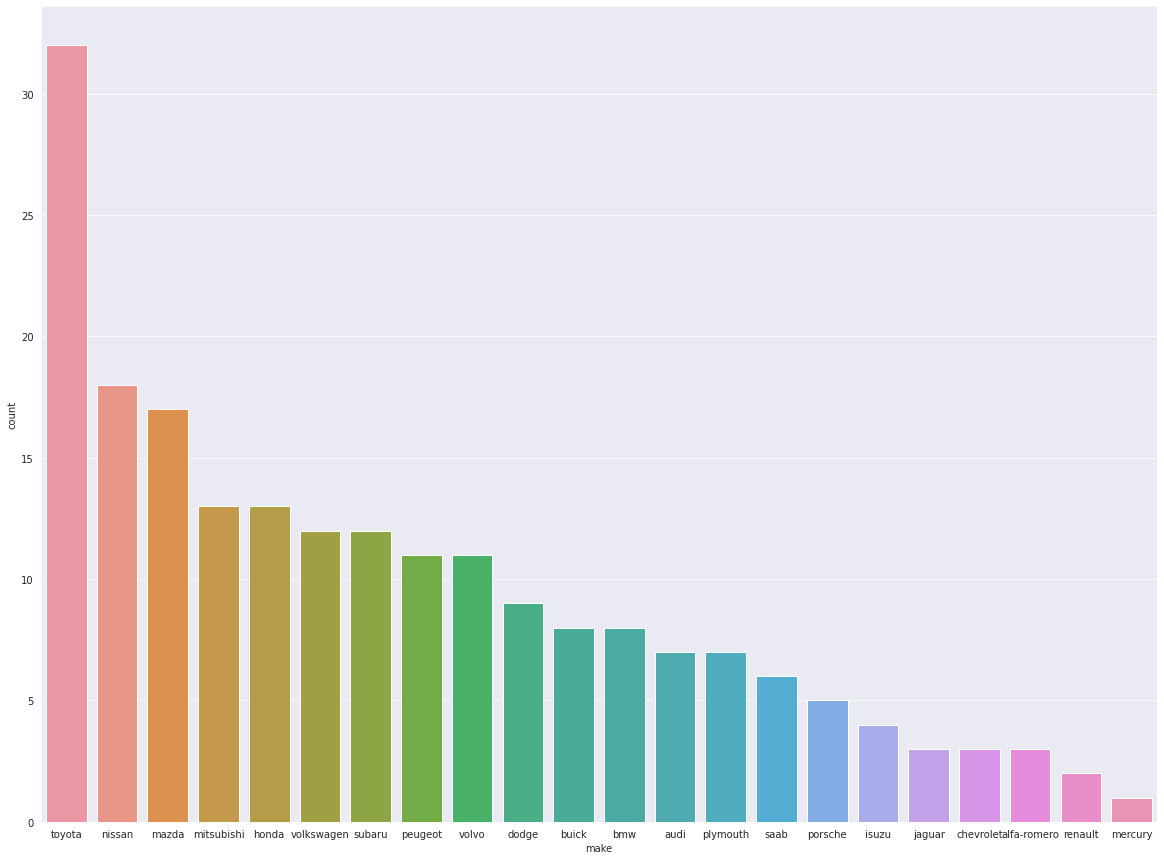

In [14]:
#plot to show company ranking in terms of sales volume
plt.figure(figsize=(20,15))
sns.countplot(x = 'make', data=train, order=train['make'].value_counts(ascending=False).index)

* Toyota's sales is unmatched in terms of volume of sales, they sold more cars than any other brand

<AxesSubplot:xlabel='make'>

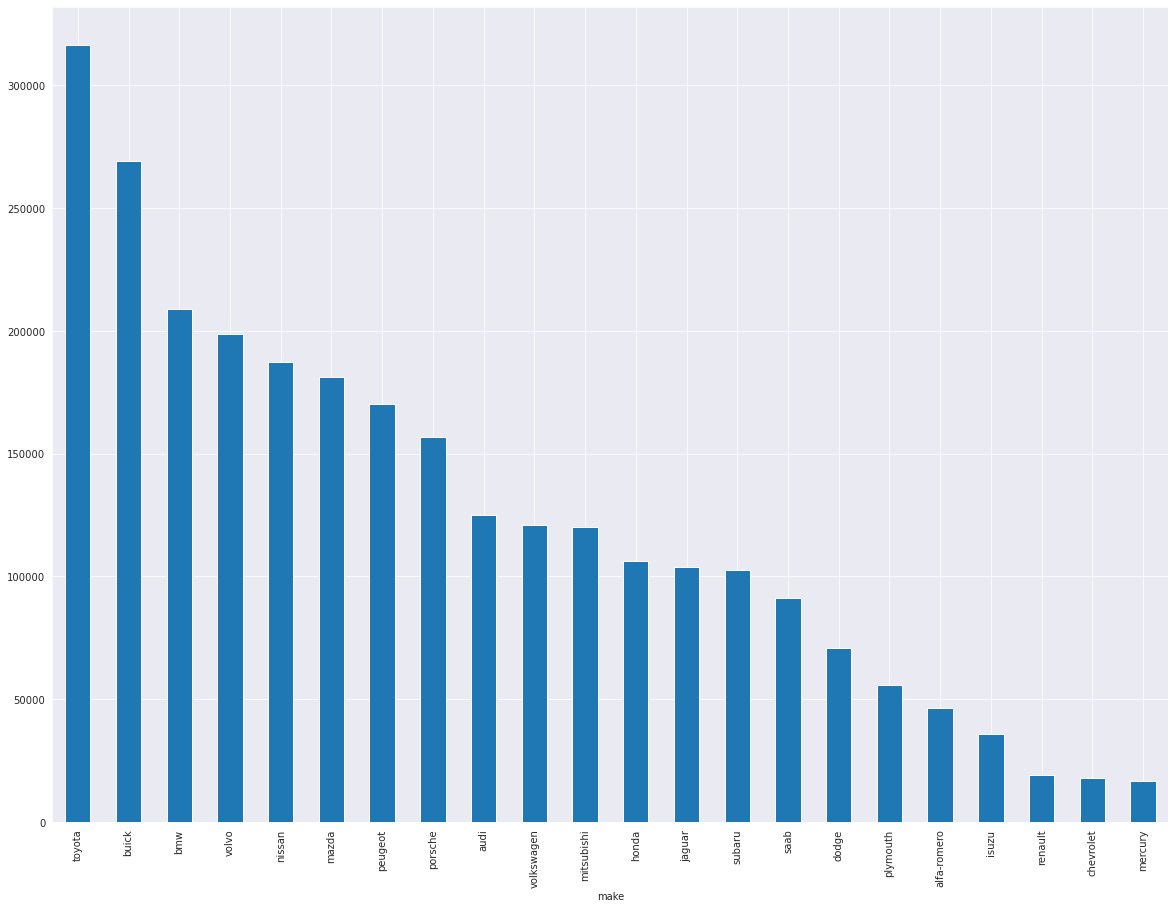

In [15]:
train.groupby('make')['price'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize=(20,15))

* Toyota's cars outsold every other brand

<AxesSubplot:xlabel='make'>

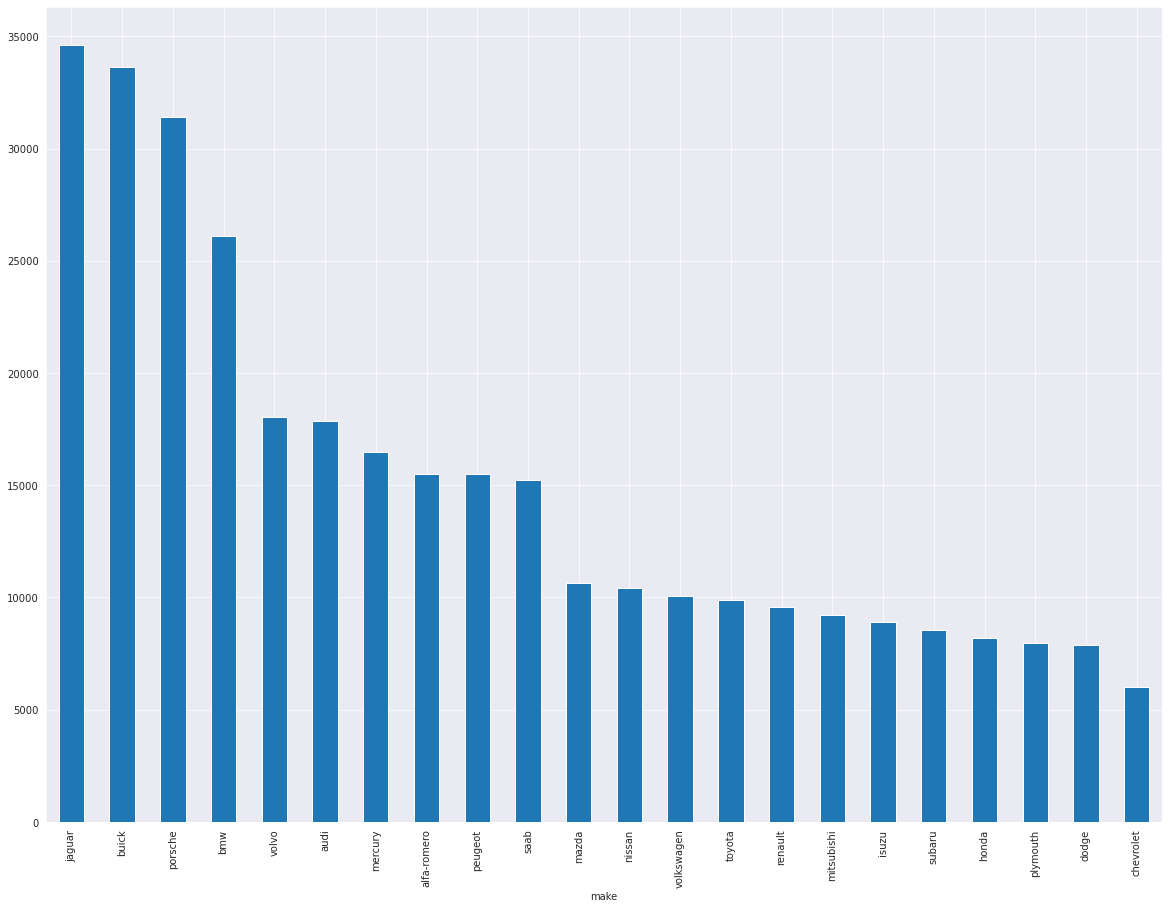

In [16]:
#barplot showing the average pricing of car manufacturers
train.groupby('make')['price'].mean().sort_values(ascending=False).plot(kind = 'bar', figsize=(20,15))

* Jaguar's cars cost more on average than other cars but they have a very low sales volume

<AxesSubplot:xlabel='doornumber,make'>

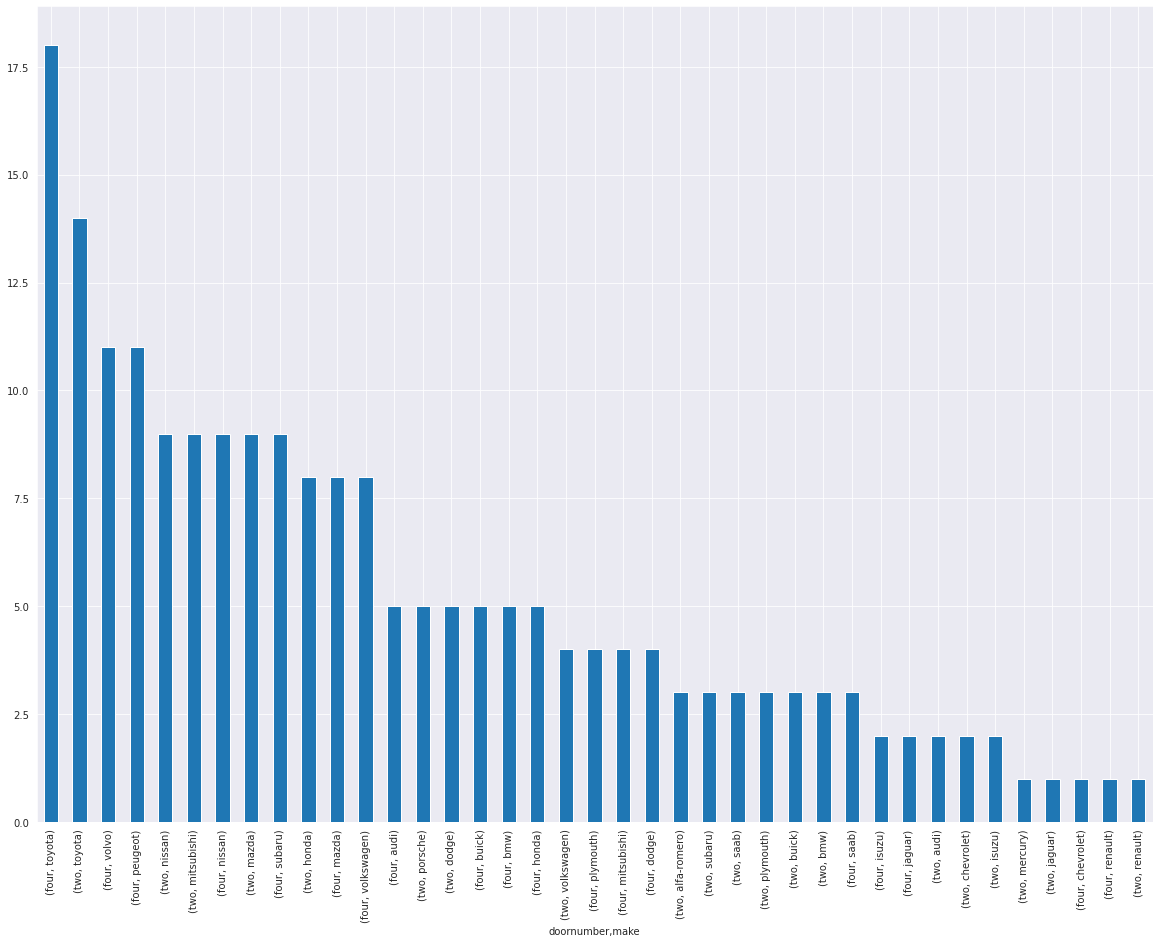

In [17]:
train.groupby('doornumber')['make'].value_counts().sort_values(ascending=False).plot(kind = 'bar', figsize=(20,15))

### Numerical Variables

<Figure size 1440x1080 with 0 Axes>

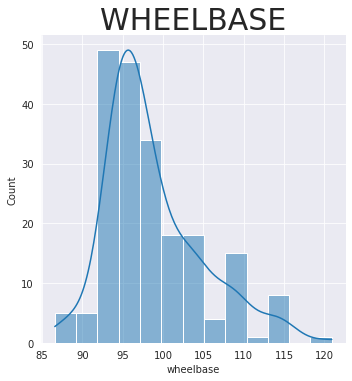

<Figure size 1440x1080 with 0 Axes>

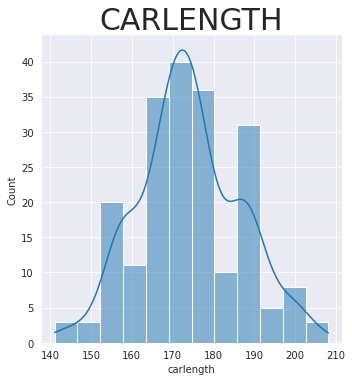

<Figure size 1440x1080 with 0 Axes>

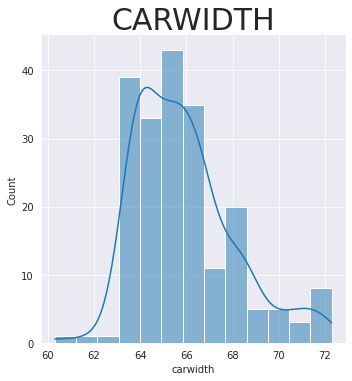

<Figure size 1440x1080 with 0 Axes>

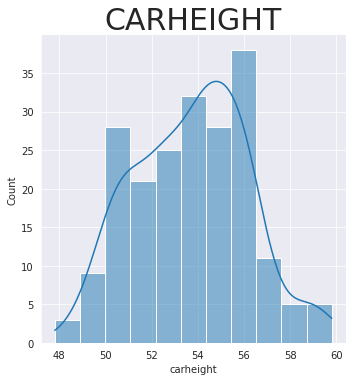

<Figure size 1440x1080 with 0 Axes>

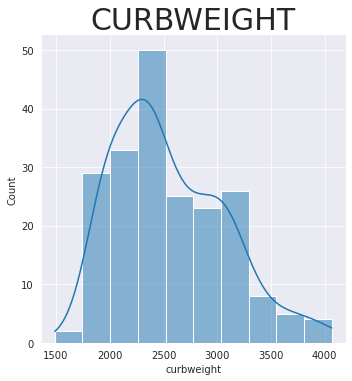

<Figure size 1440x1080 with 0 Axes>

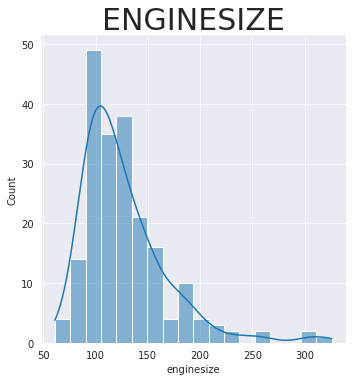

<Figure size 1440x1080 with 0 Axes>

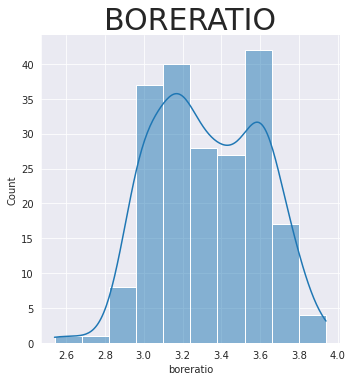

<Figure size 1440x1080 with 0 Axes>

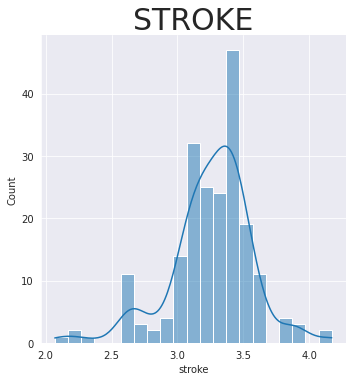

<Figure size 1440x1080 with 0 Axes>

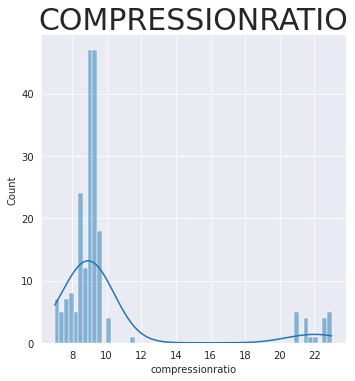

<Figure size 1440x1080 with 0 Axes>

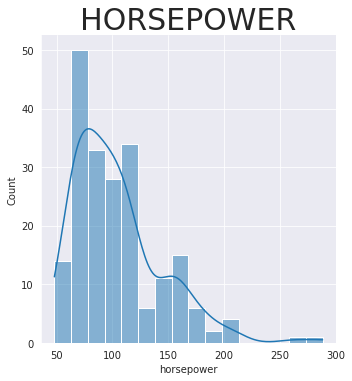

<Figure size 1440x1080 with 0 Axes>

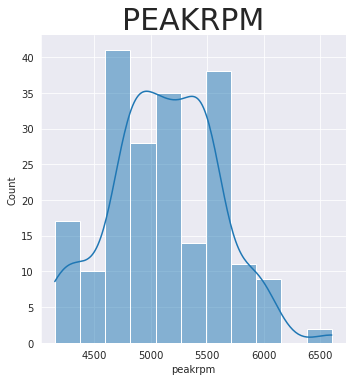

<Figure size 1440x1080 with 0 Axes>

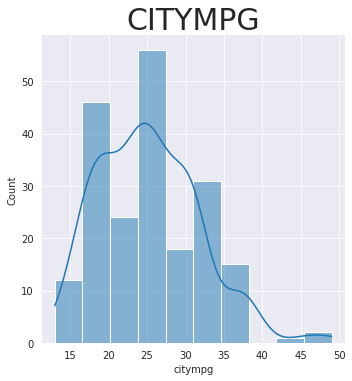

<Figure size 1440x1080 with 0 Axes>

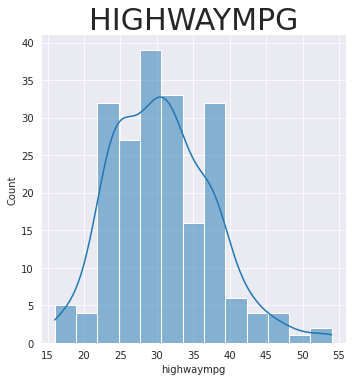

<Figure size 1440x1080 with 0 Axes>

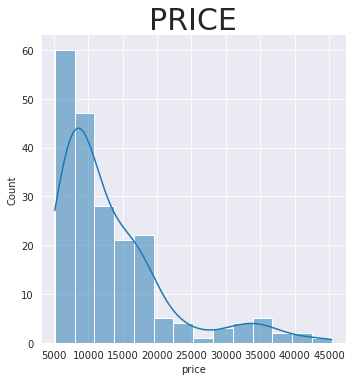

<Figure size 1440x1080 with 0 Axes>

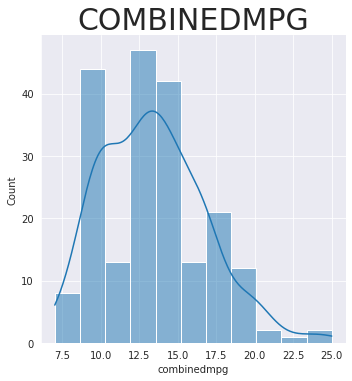

In [18]:
#loop to display the distribution of all the numerical columns in the dataset
for col in train.select_dtypes('number').drop(columns=['car_ID', 'symboling']):
    plt.figure(figsize=(20,15))
    sns.displot(train[col], kde = True)
    plt.title(col.upper(), size=30)
    plt.show()

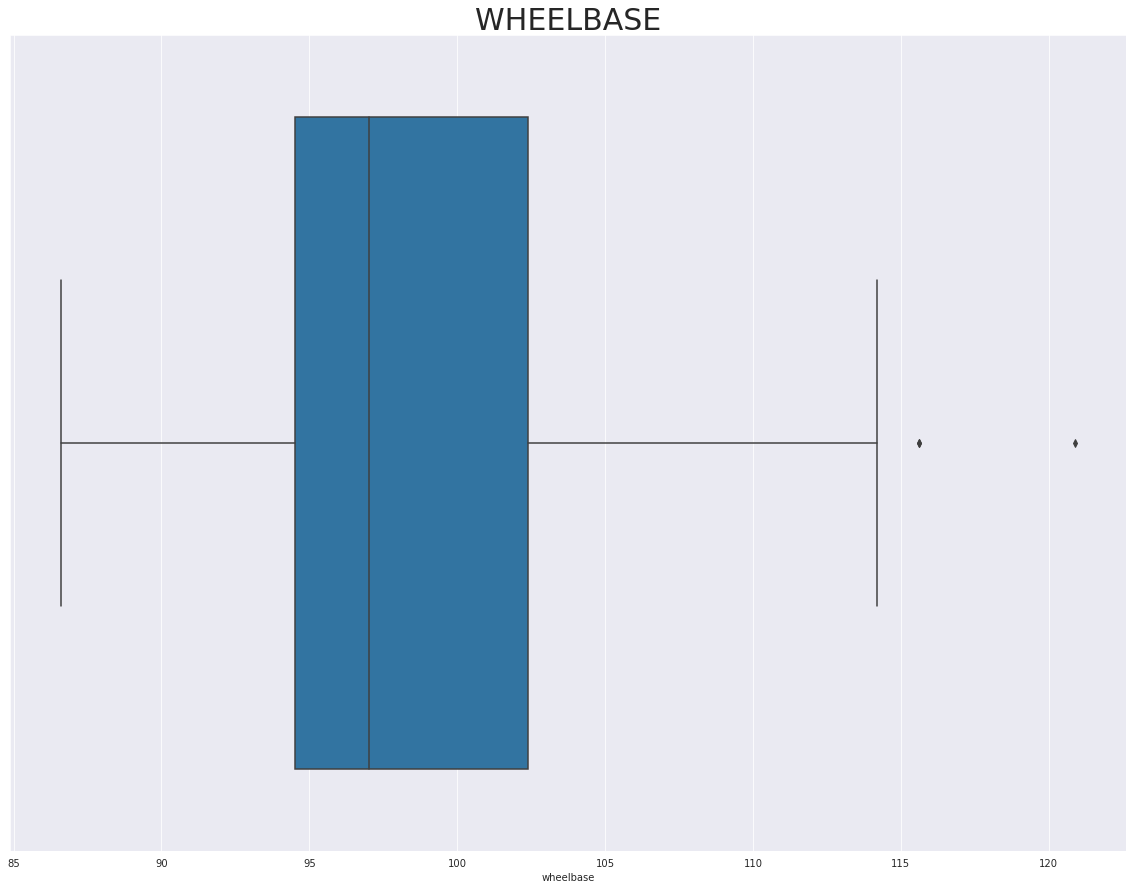

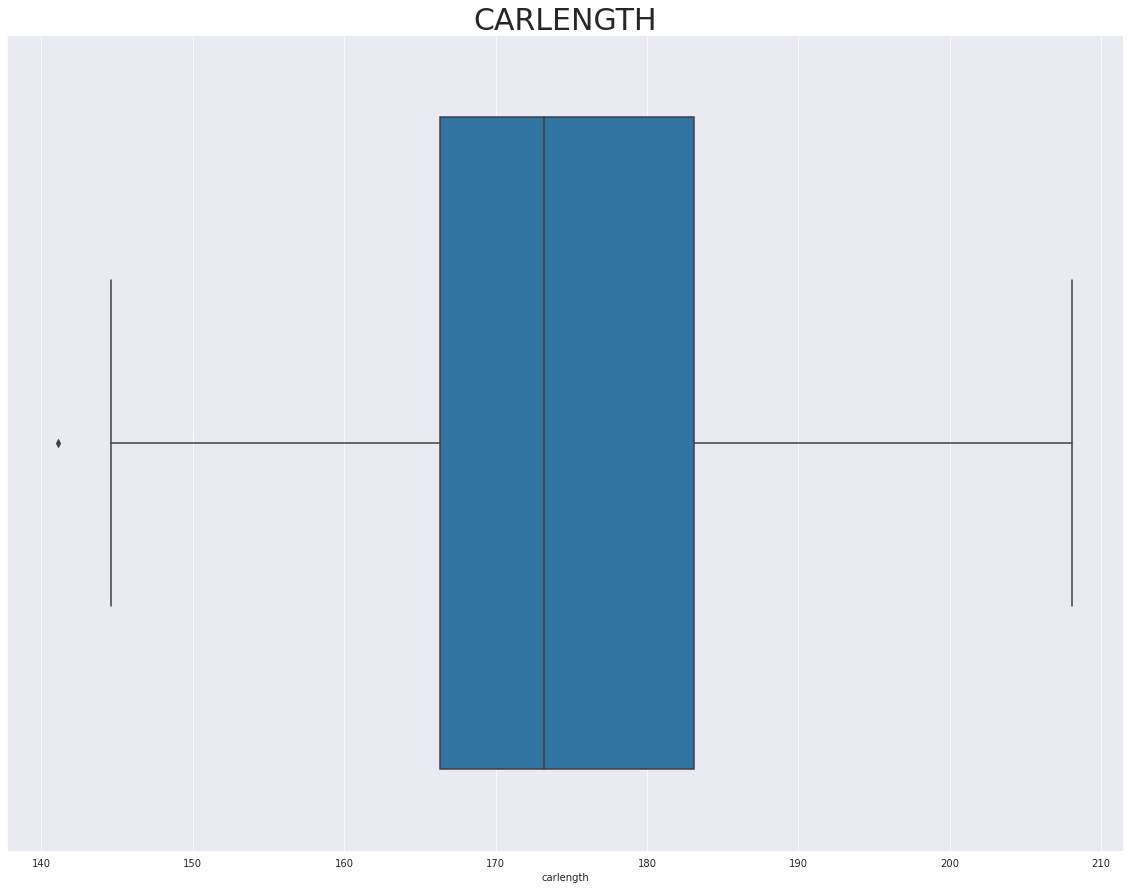

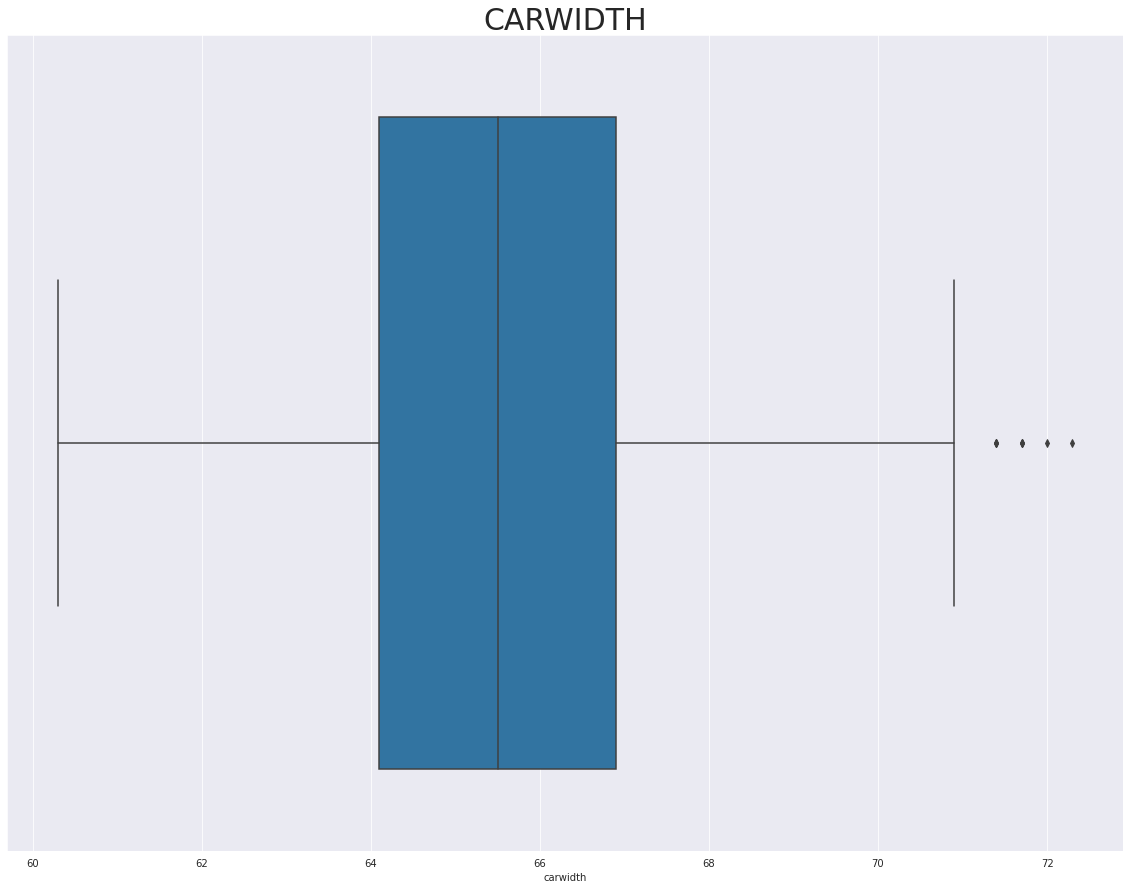

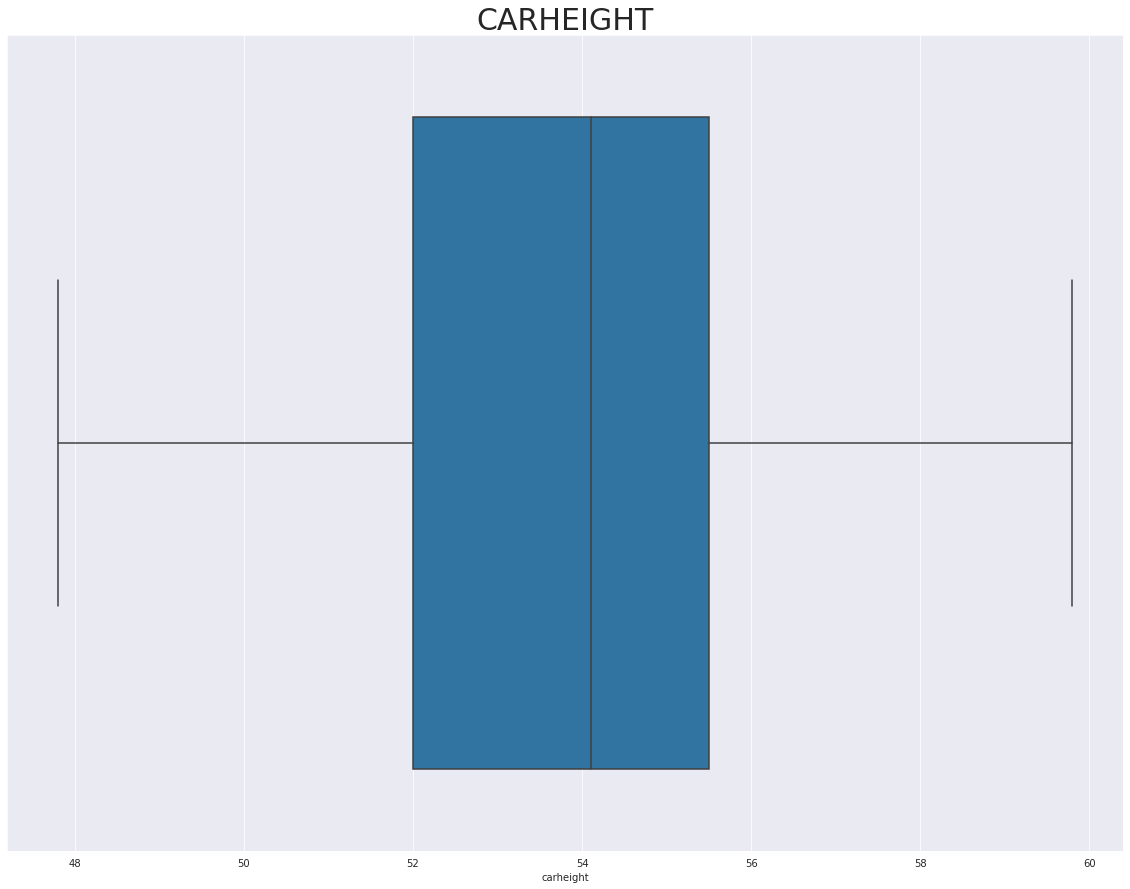

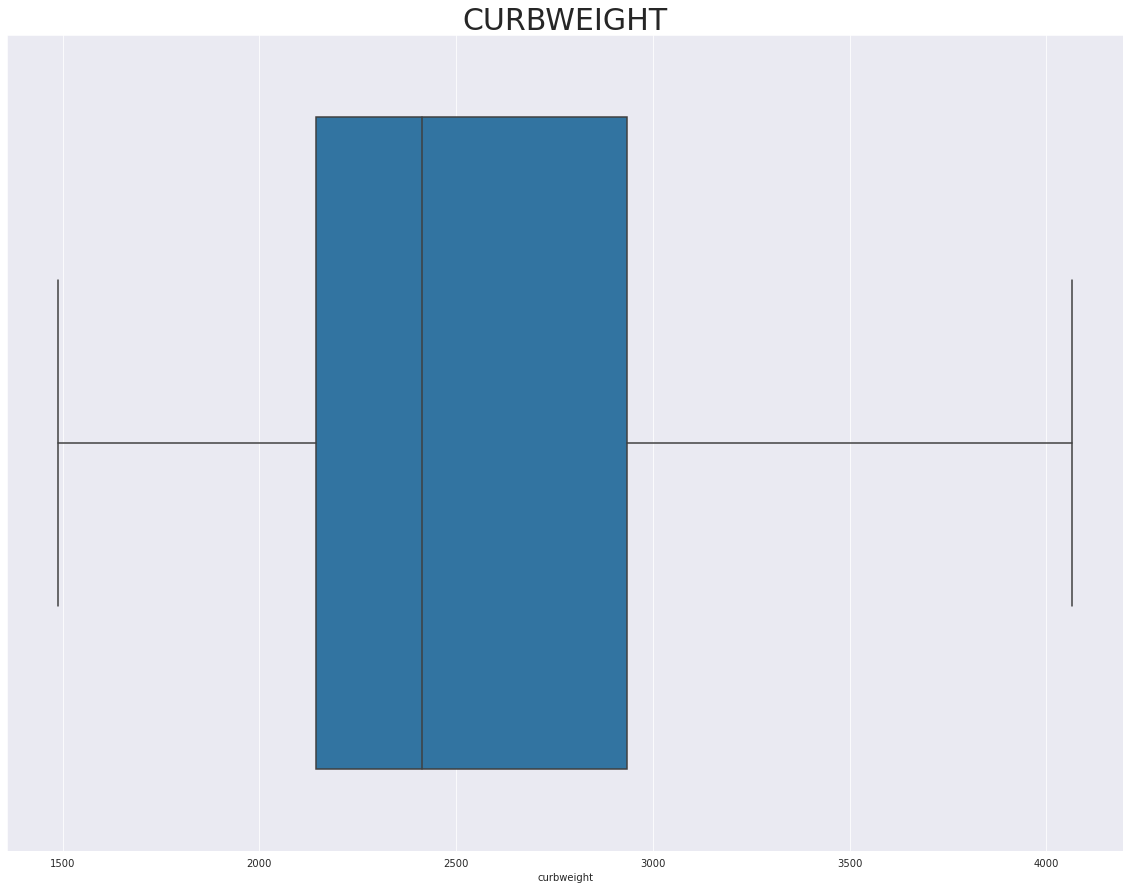

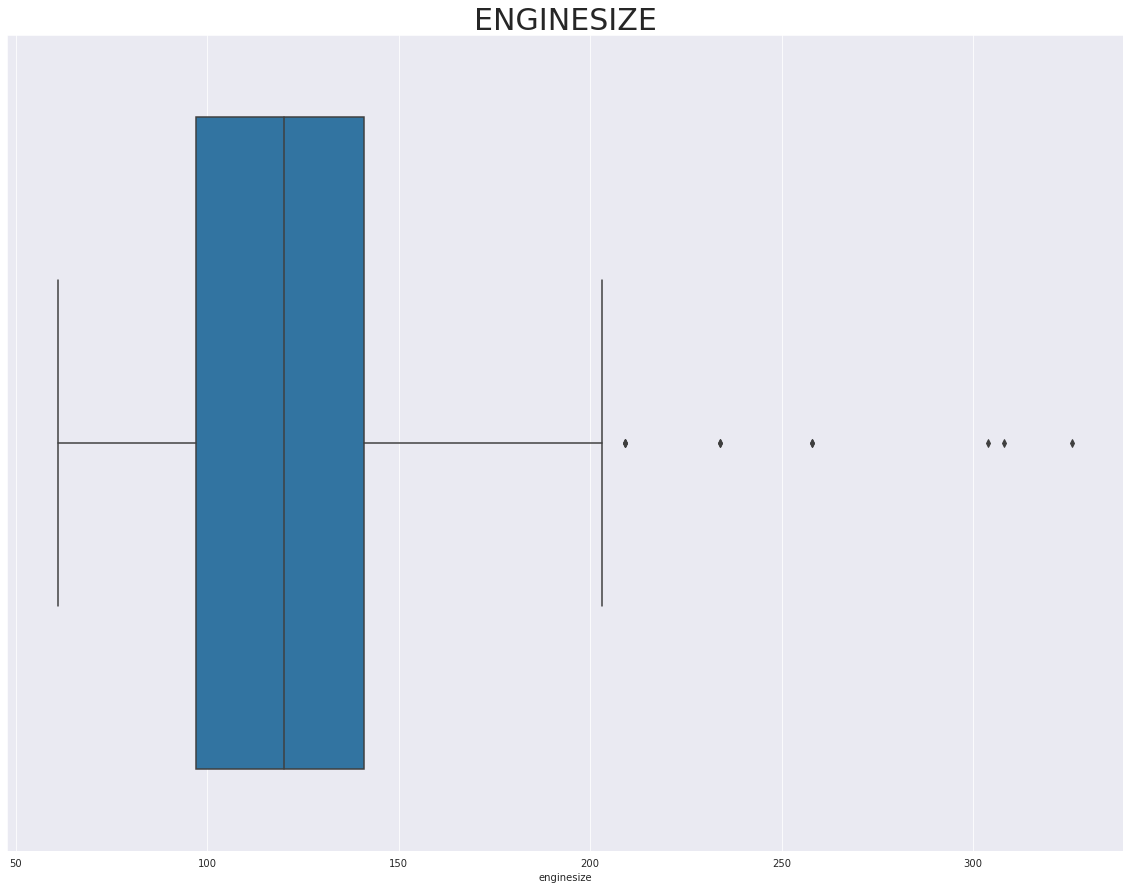

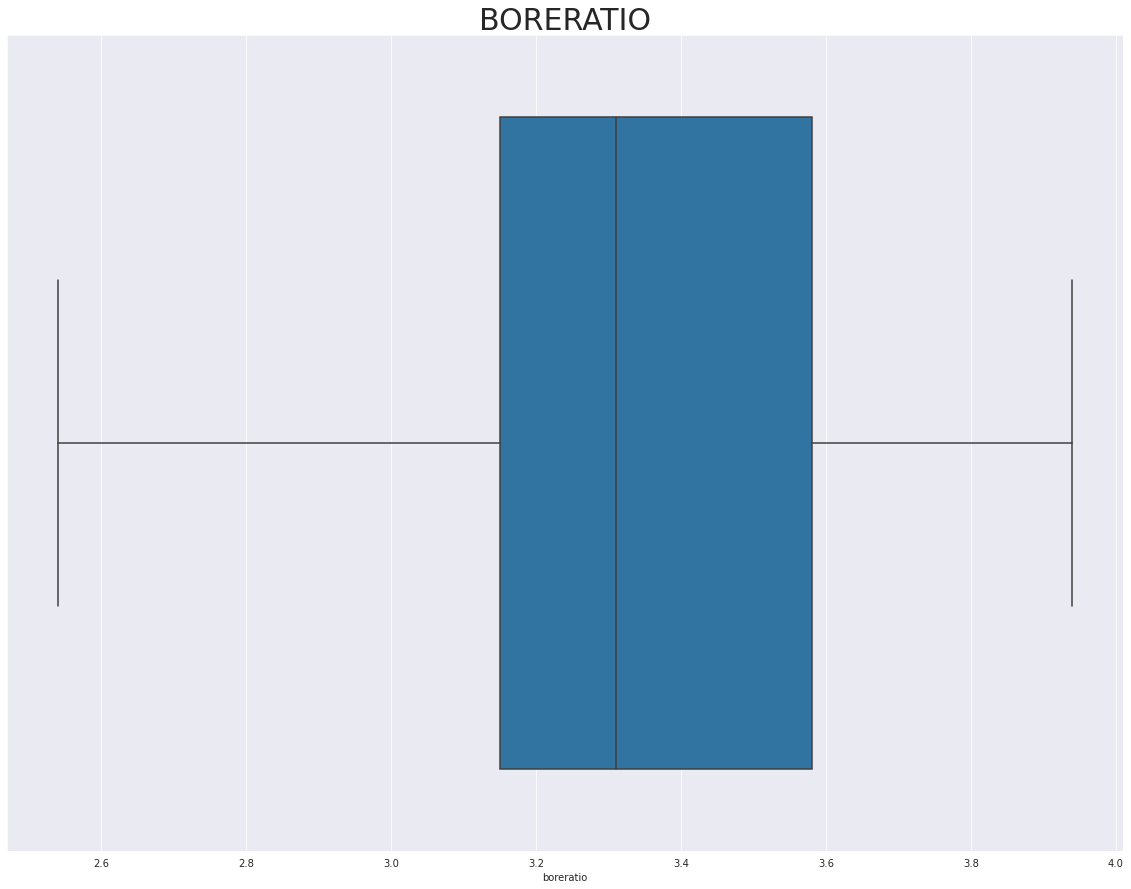

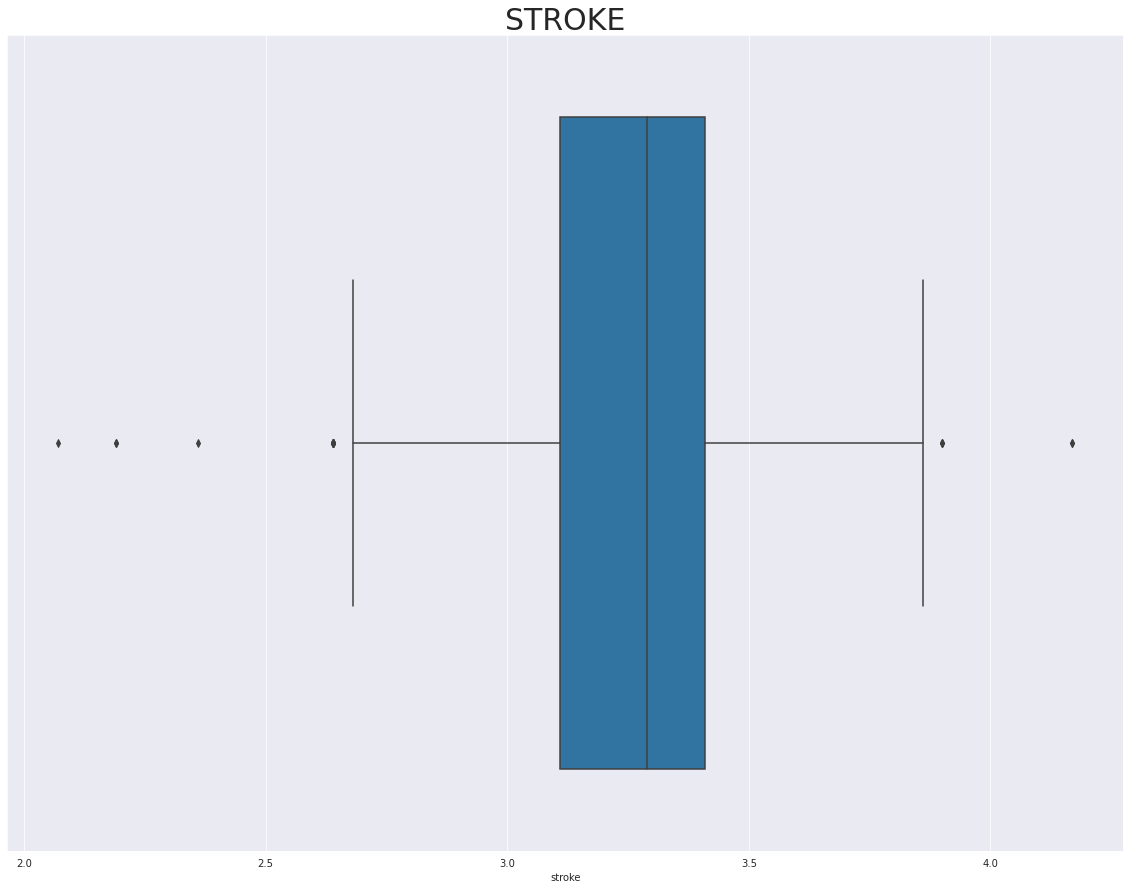

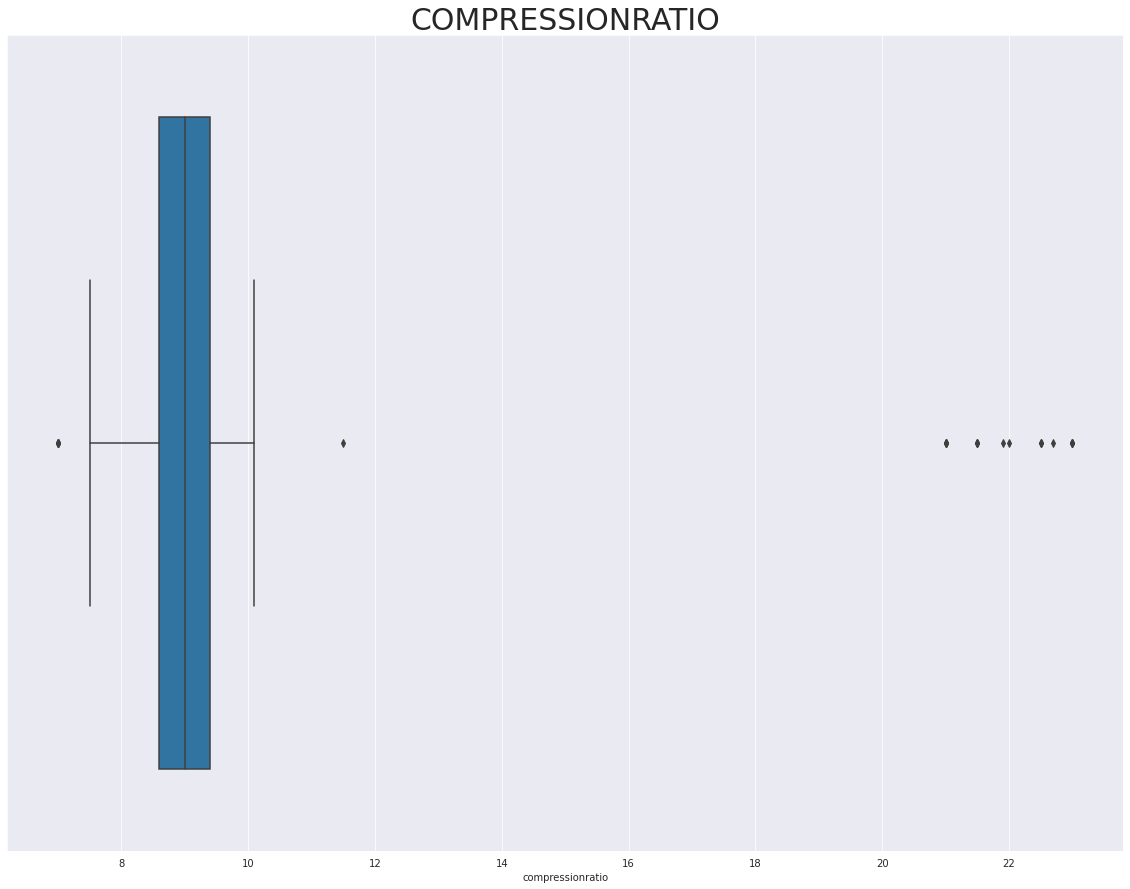

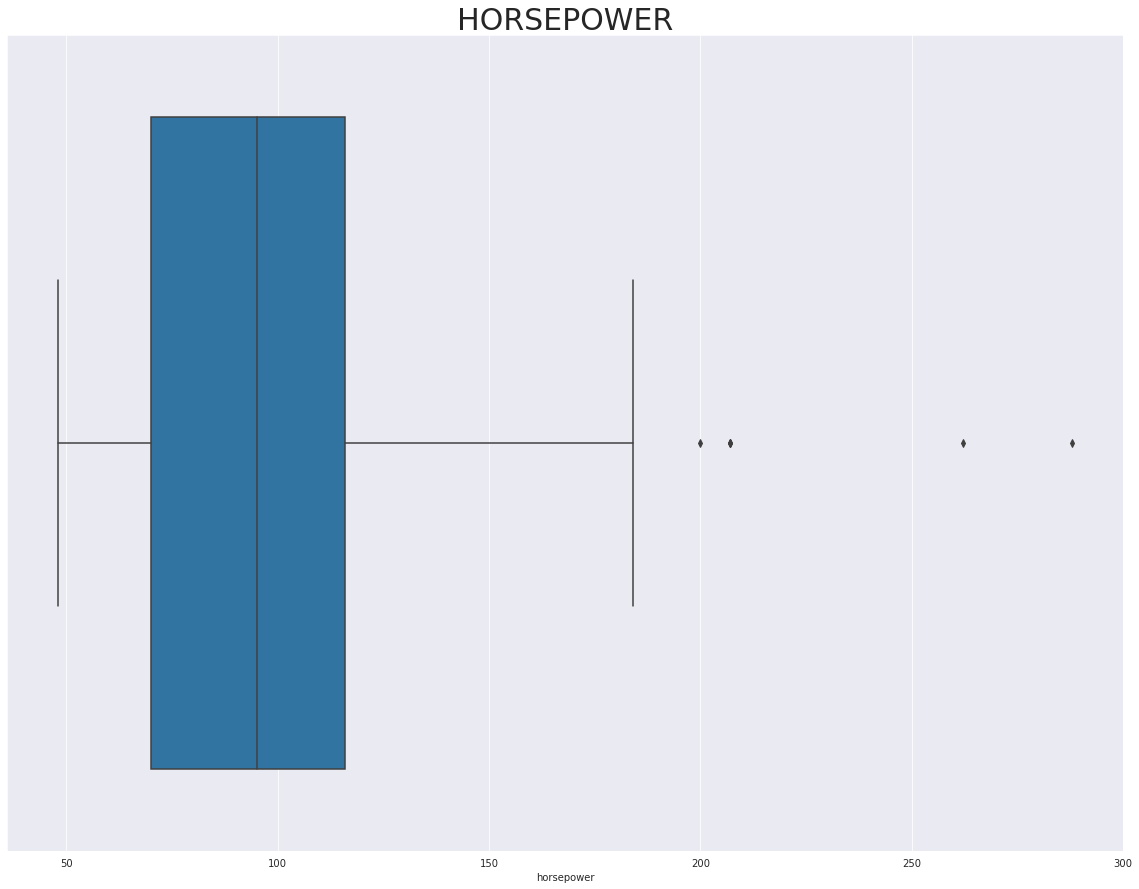

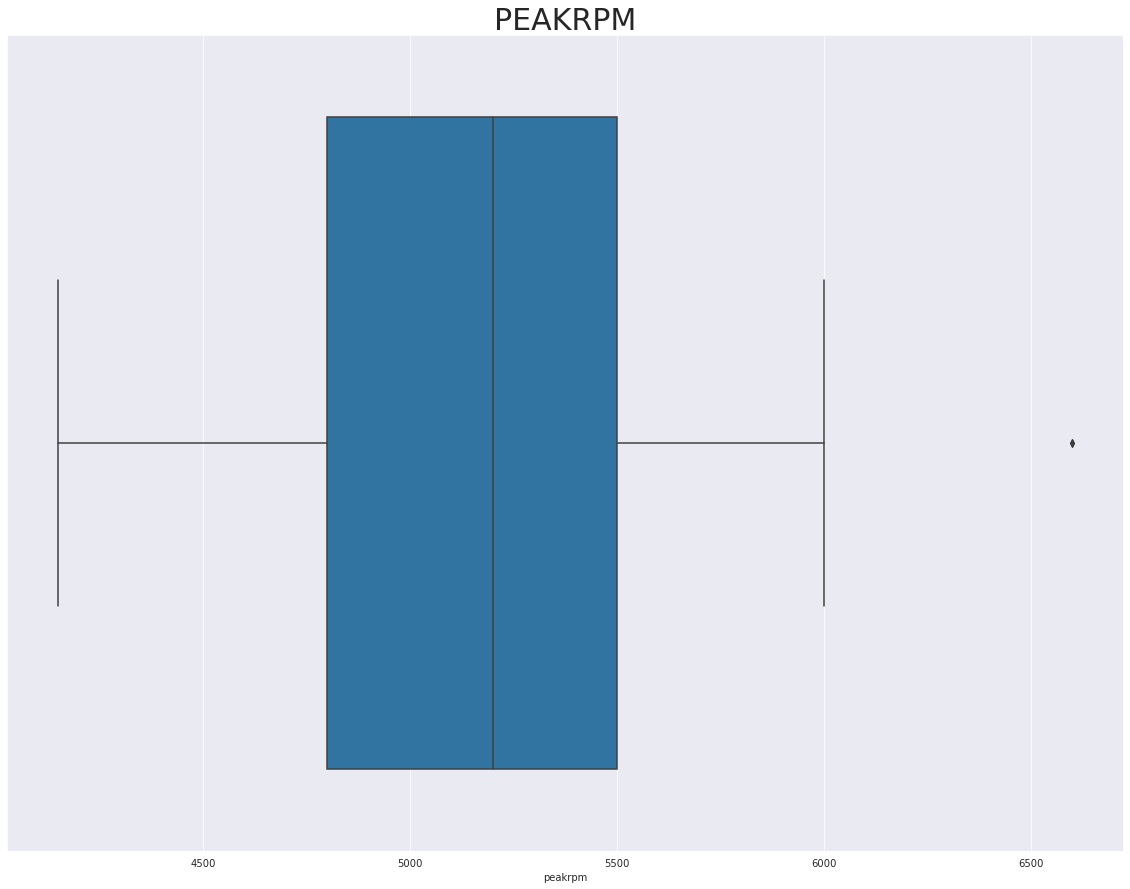

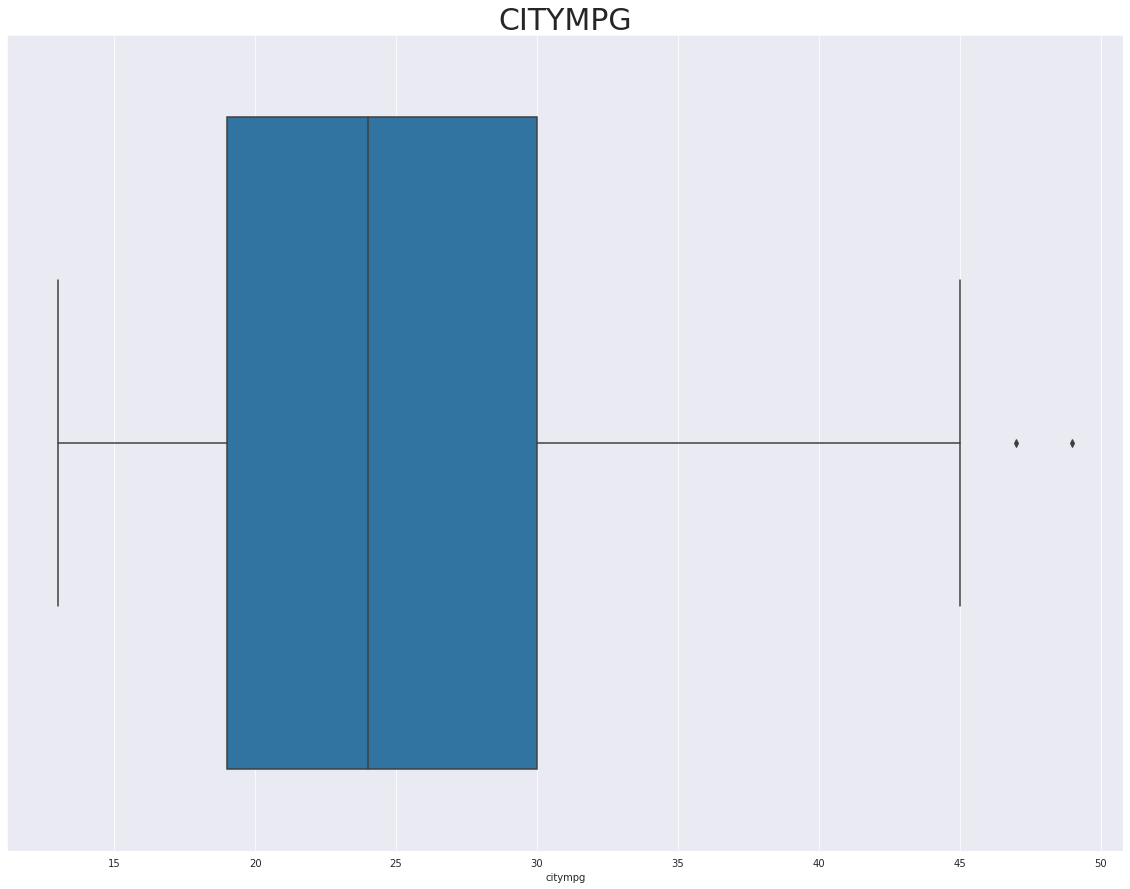

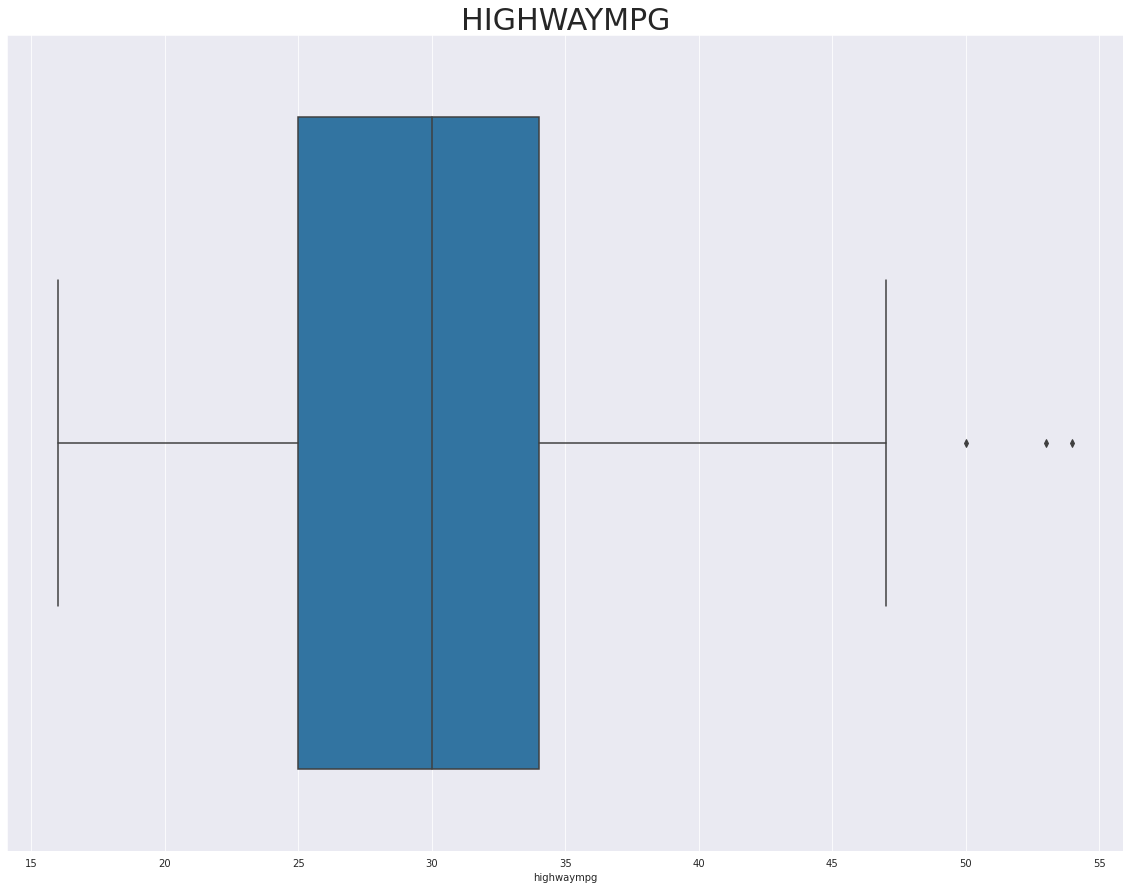

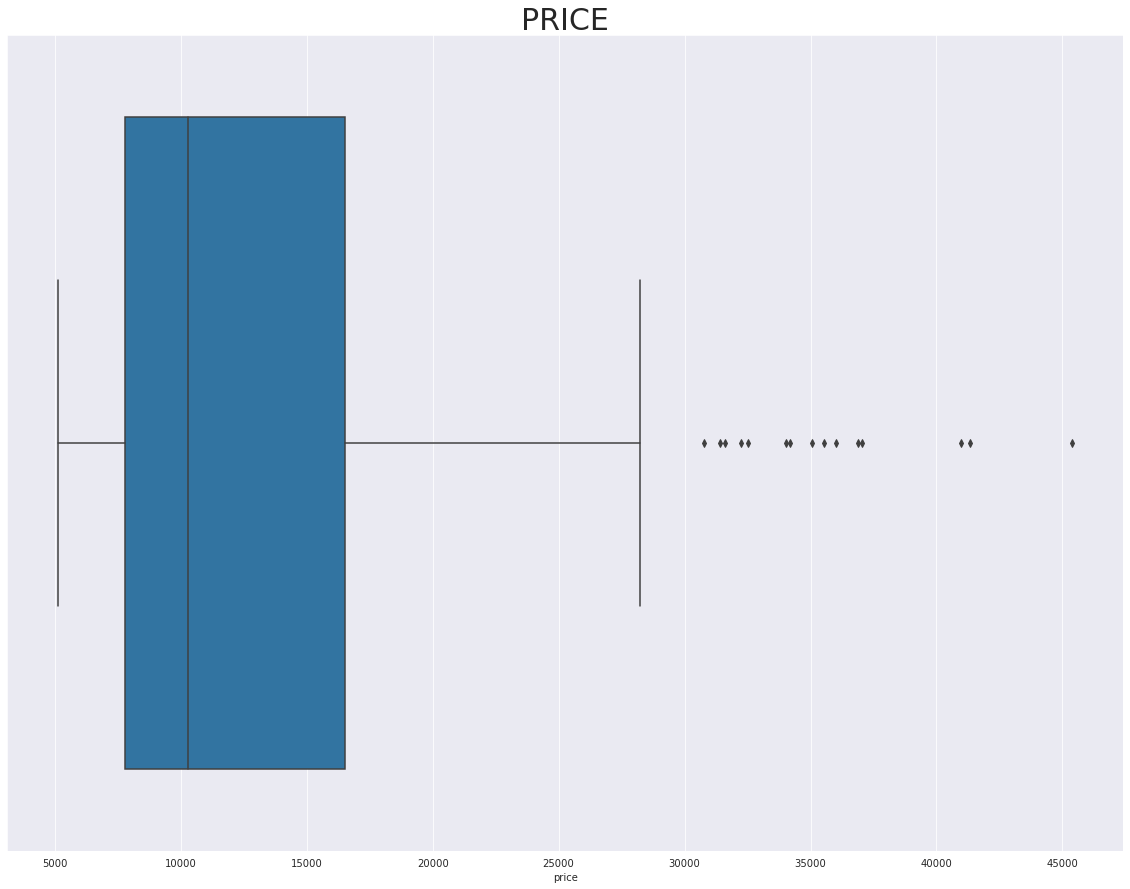

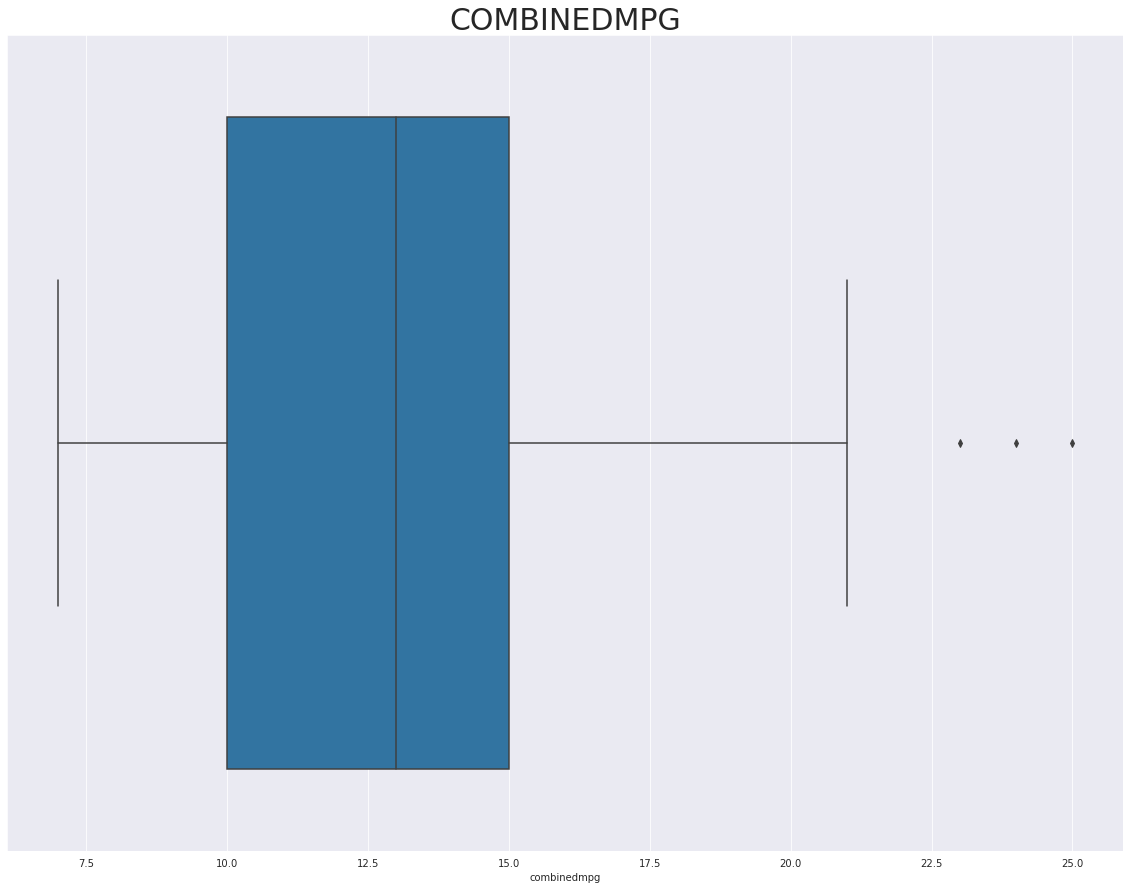

In [19]:
#loop to display the distribution of all the numerical columns in the dataset
for col in train.select_dtypes('number').drop(columns=['car_ID', 'symboling']):
    plt.figure(figsize=(20,15))
    sns.boxplot(x = train[col], orient = 'h')
    plt.title(col.upper(), size = 30)
    plt.show()

* There aren't many outliers in the data and I suspect the outliers found are valuable to the model to be trained and so no need of outlier treatment

In [20]:
train.loc[train.price > 30000]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make,combinedmpg
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,bmw,9
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw,9
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,bmw,8
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar,8
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar,8
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar,7
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick,11
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick,8
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,buick,8
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick,7


In [21]:
train.loc[train.price < 10000]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make,combinedmpg
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151.0,chevrolet,24
19,20,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295.0,chevrolet,20
20,21,0,chevrolet vega 2300,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6575.0,chevrolet,20
21,22,1,dodge rampage,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572.0,dodge,19
22,23,1,dodge challenger se,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6377.0,dodge,17
23,24,1,dodge d200,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,mpfi,3.03,3.39,7.60,102,5500,24,30,7957.0,dodge,13
24,25,1,dodge monaco (sw),gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6229.0,dodge,17
25,26,1,dodge colt hardtop,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6692.0,dodge,17
26,27,1,dodge colt (sw),gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,7609.0,dodge,17
27,28,1,dodge coronet custom,gas,turbo,two,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.60,102,5500,24,30,8558.0,dodge,13


* The bigger the engine, the higher the price of the car.
* The cheaper cars have less than five cylinders, while the more expensive cars have more of six and eight cylinders.
* The cheaper cars have fwd while the most expensive ones sport rwd.
* Cars with more horsepower are clearly more expensive.
* The pricier cars have less fuel economy, probably beacause of their larger engines.


In [22]:
train['make'].value_counts() #getting number of cars each brand sold

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: make, dtype: int64

* Japanese cars are the best-selling car brands. They fill the top 5 spots of most cars sold with Toyota leading the pack with 32 cars sold, almost double of the next best-selling brand, Nissan.

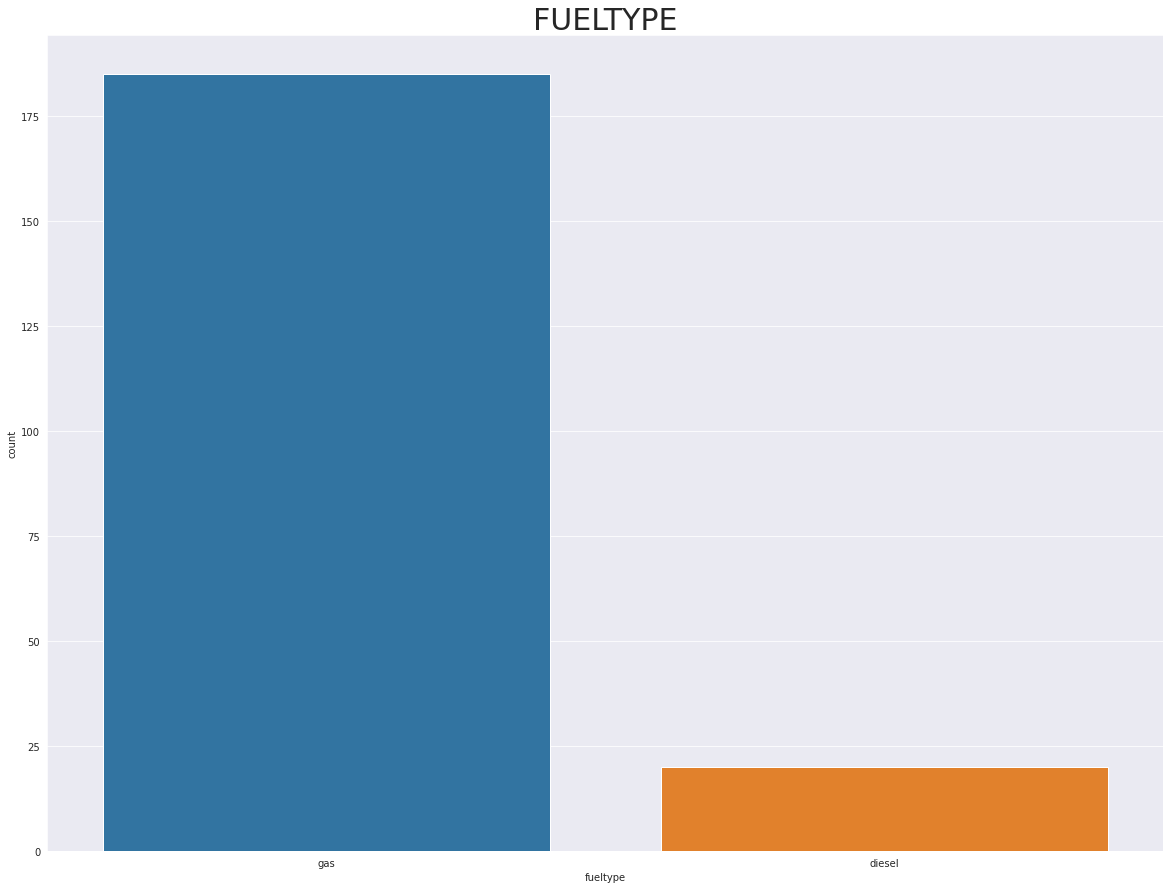

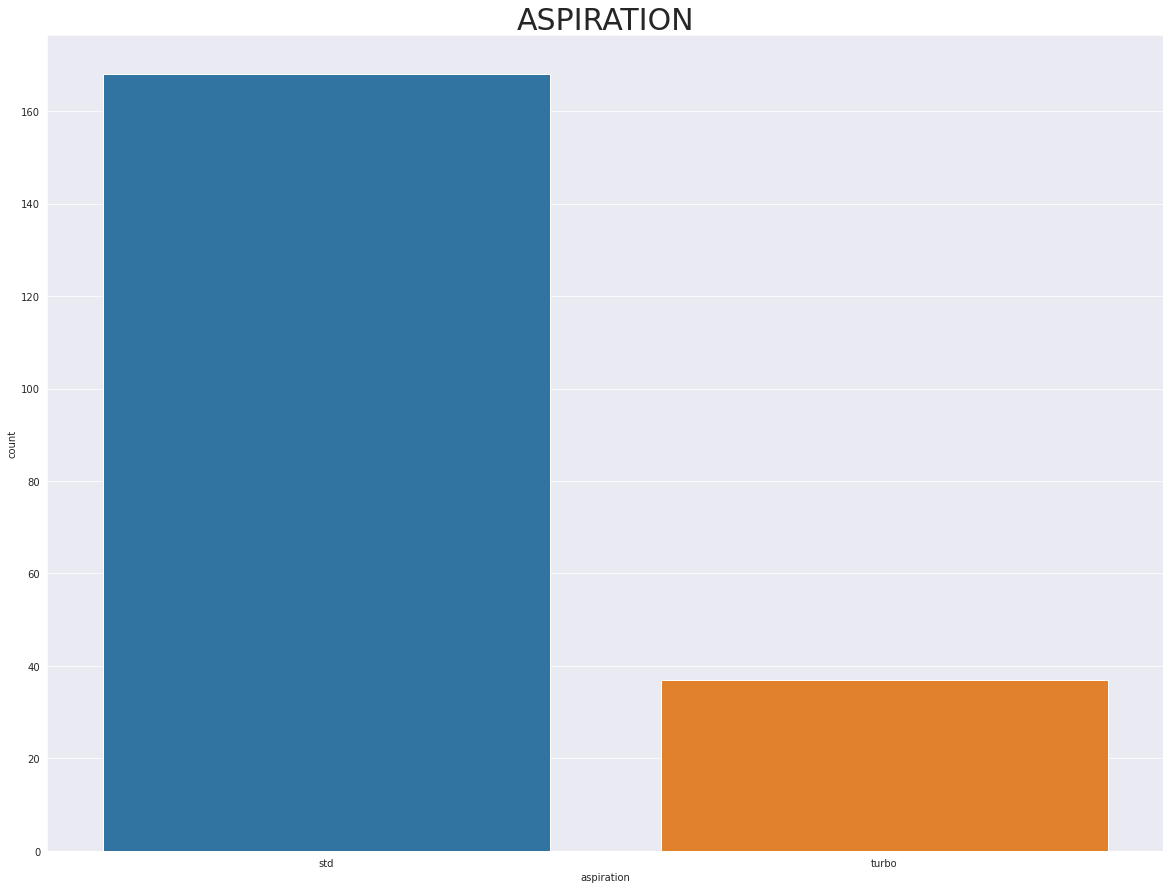

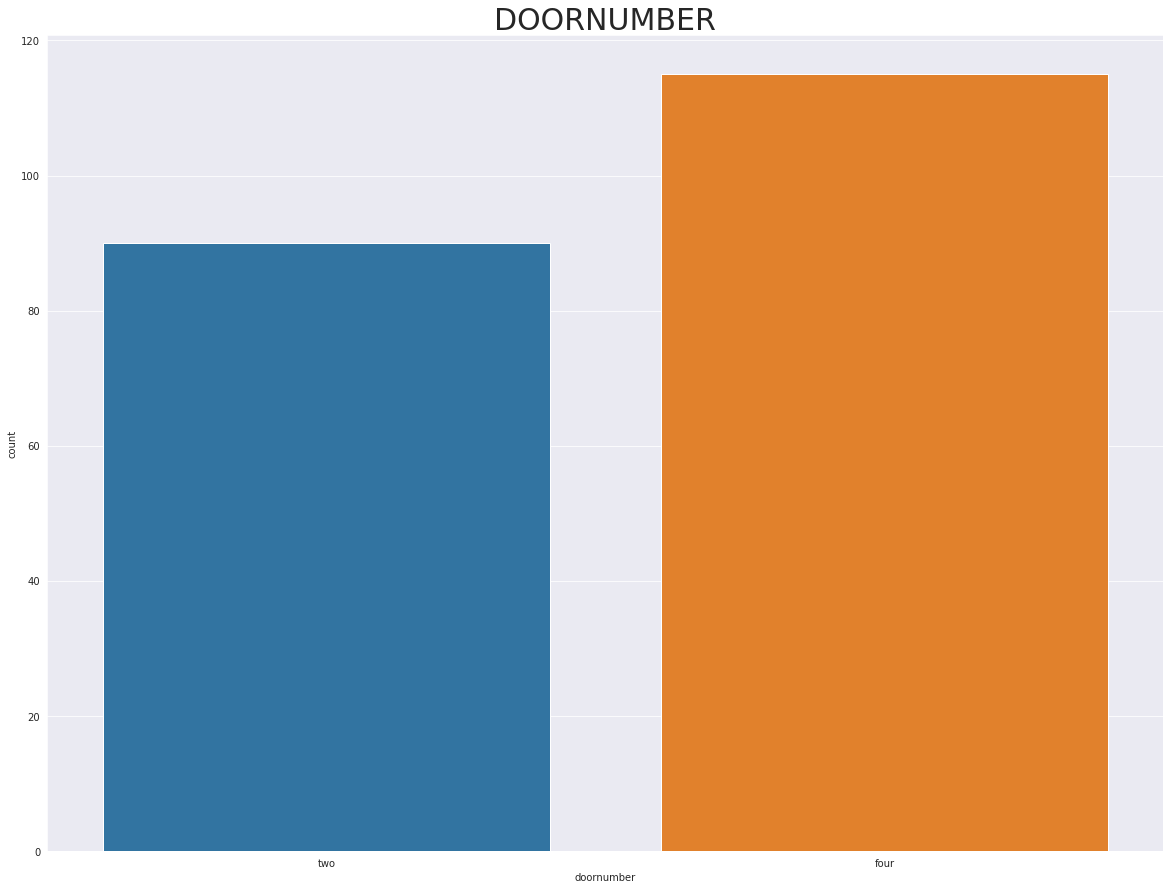

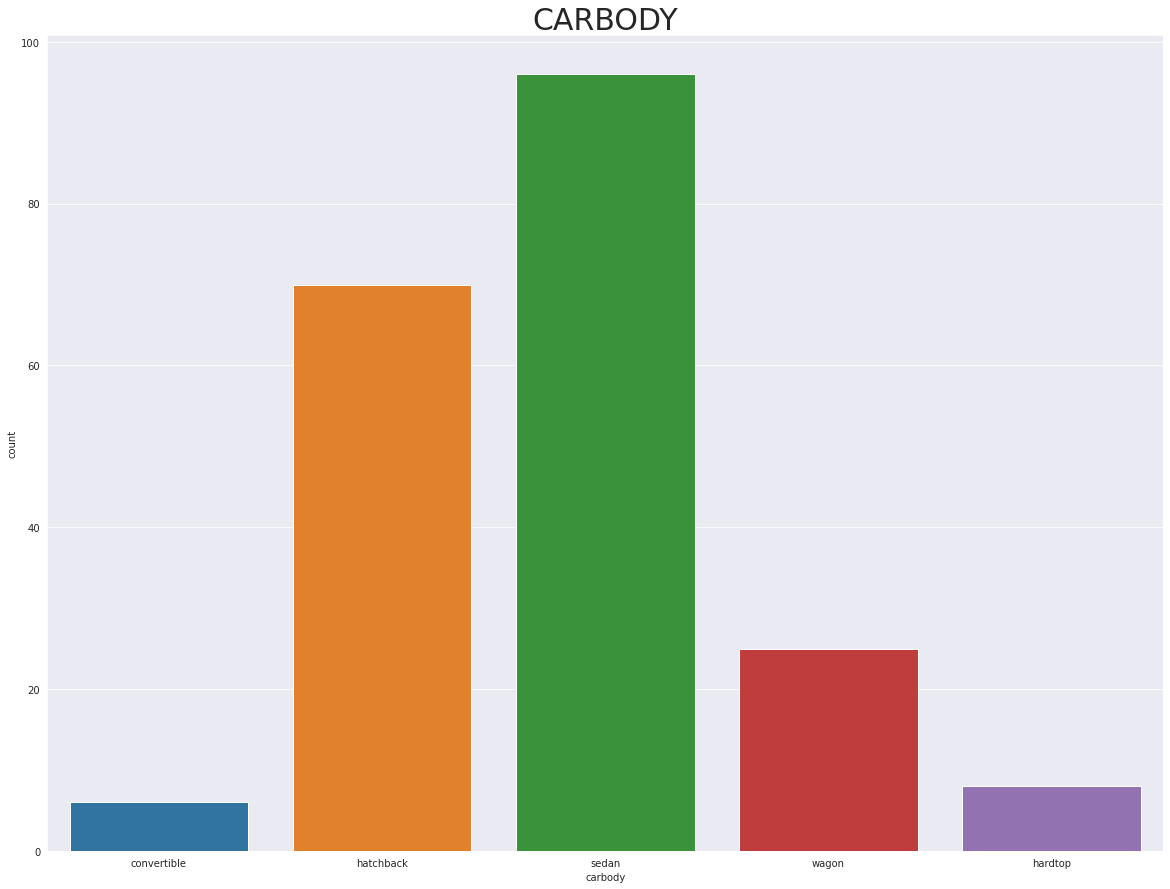

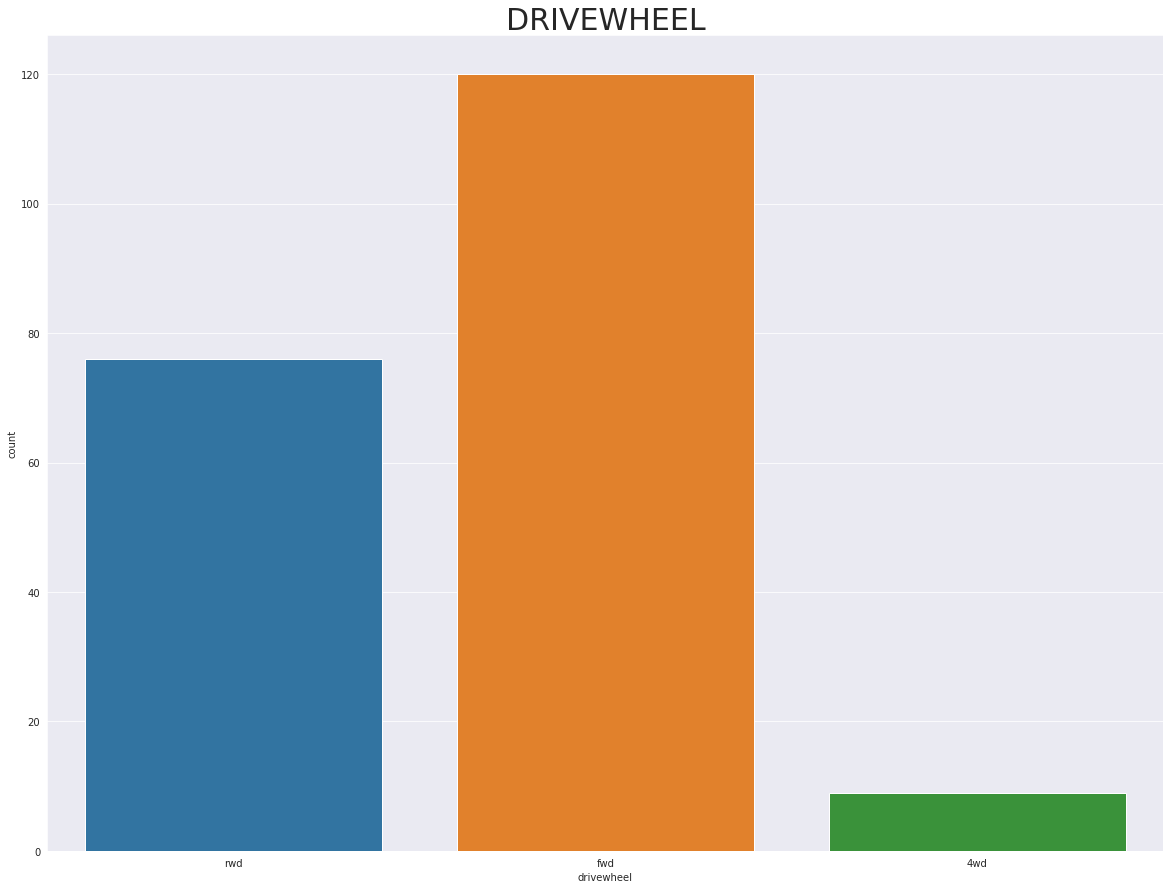

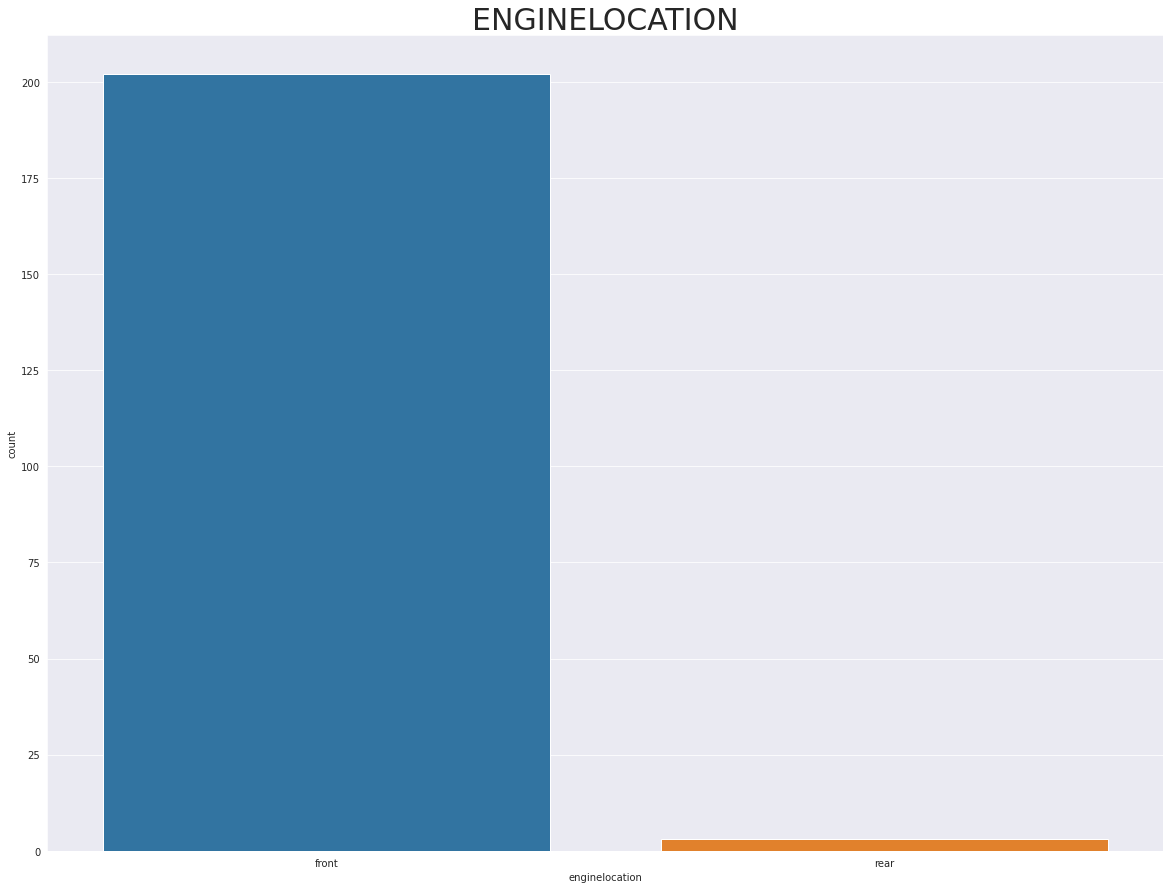

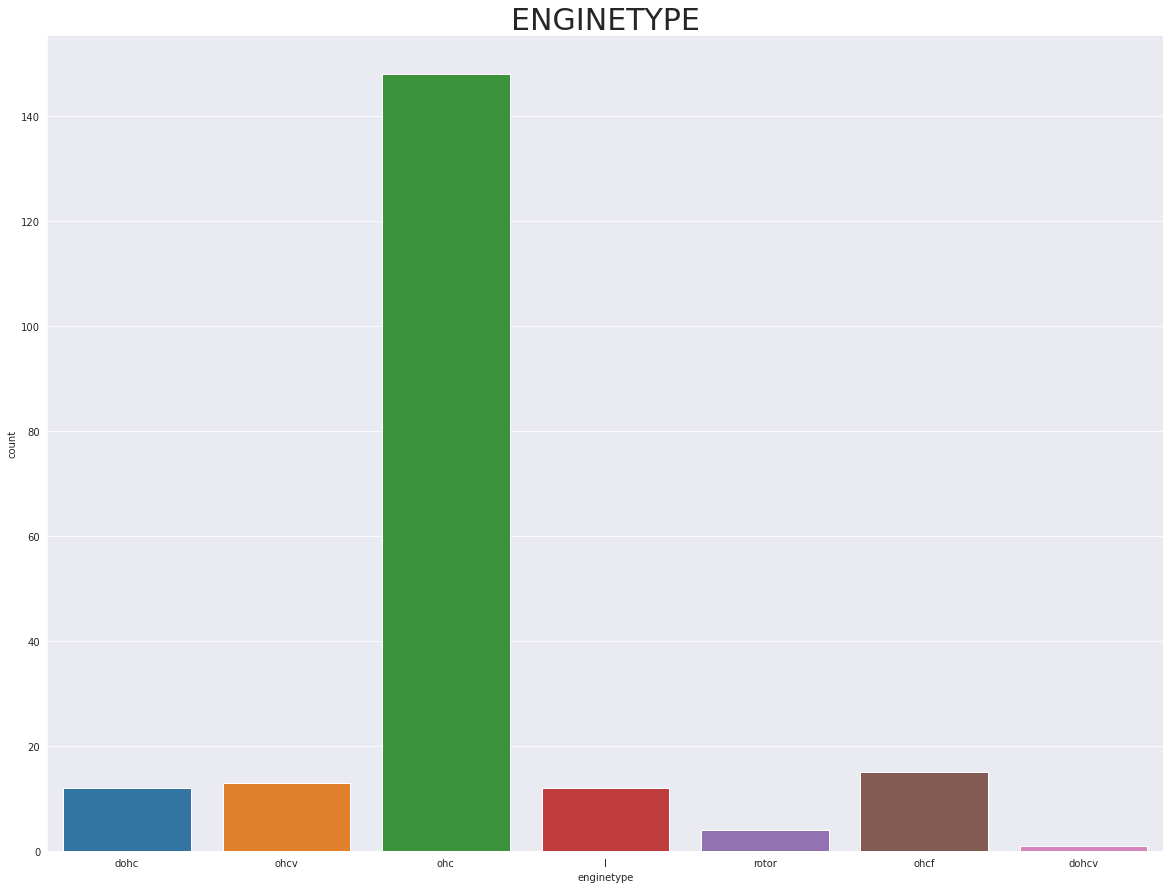

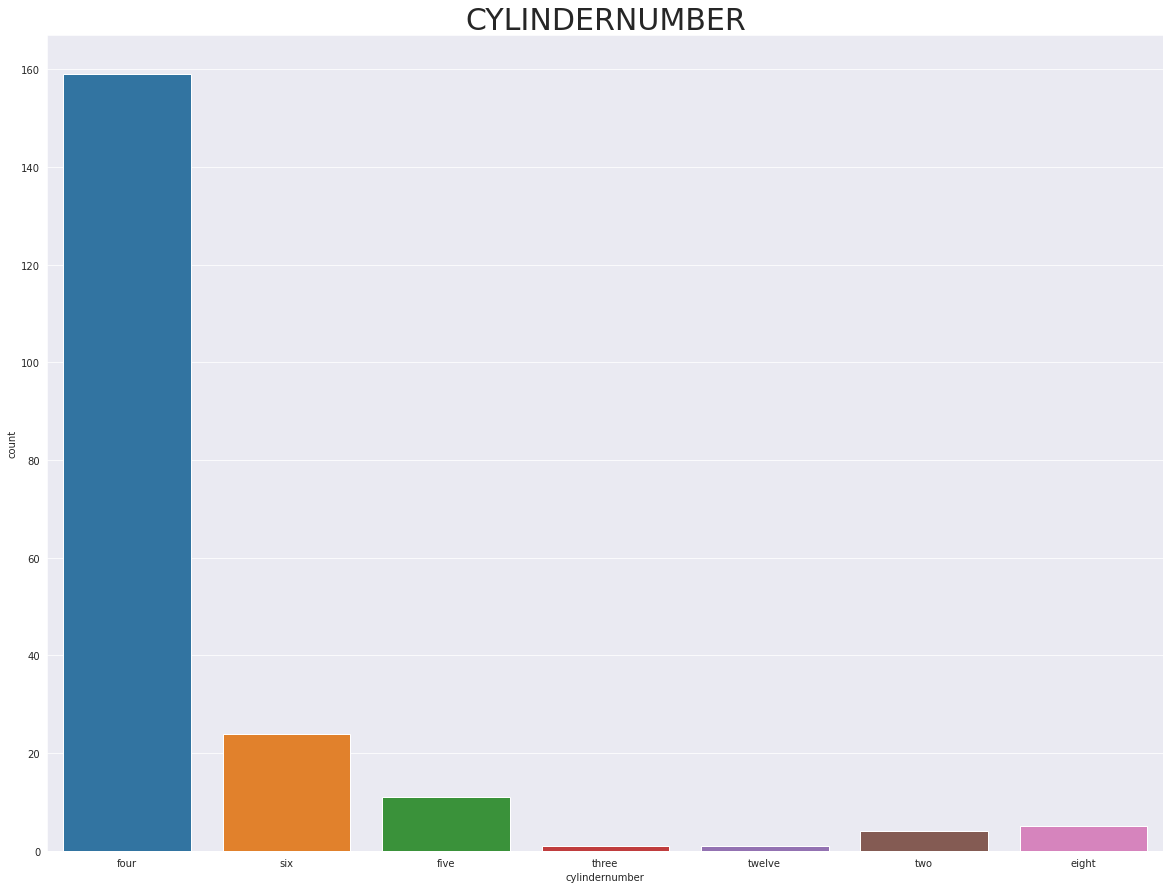

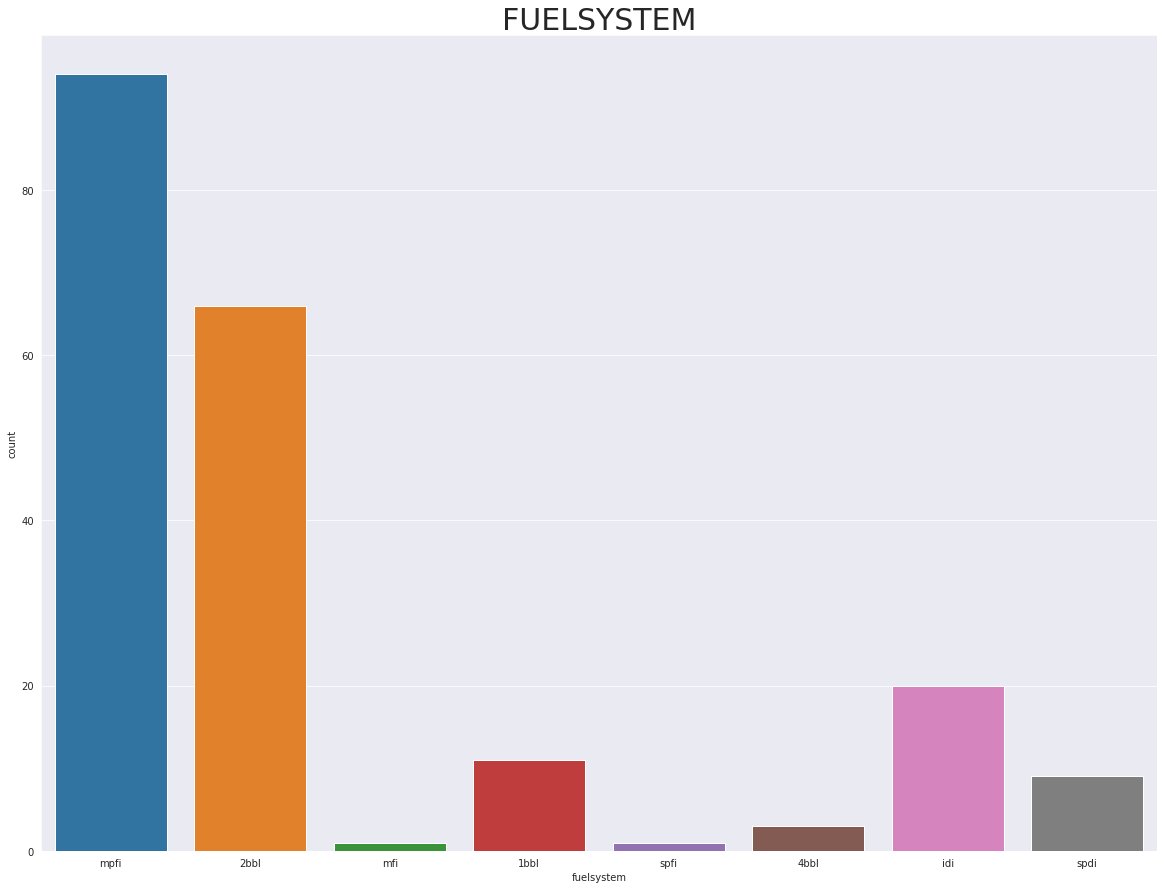

In [23]:
#loop to display the distribution of all the categorical columns in the dataset
for col in train.select_dtypes('object').drop(columns=['CarName', 'make']):
    plt.figure(figsize=(20,15))
    plt.title(col.upper(), size = 30)
    sns.countplot(x = train[col])
    plt.show()

<AxesSubplot:xlabel='enginesize', ylabel='combinedmpg'>

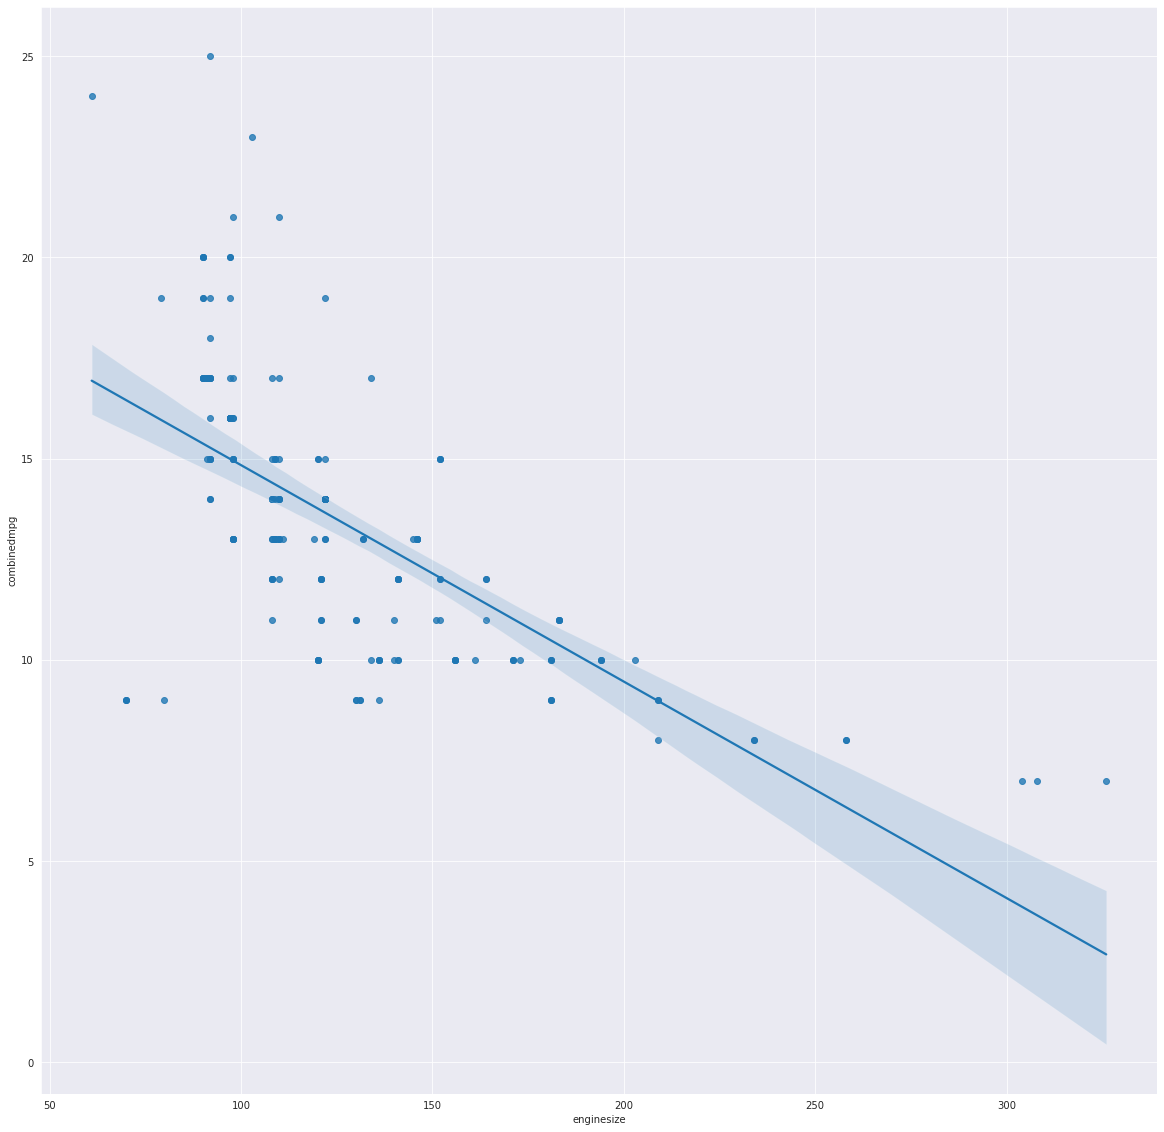

In [24]:
#plot showing relationship between fuel economy and engine size
plt.figure(figsize=(20,20))
sns.regplot(y='combinedmpg', x='enginesize', data=train)

* The plot shows that bigger engines have less fuel economy

<AxesSubplot:title={'center':'Combined MPG vs Price'}, xlabel='combinedmpg', ylabel='price'>

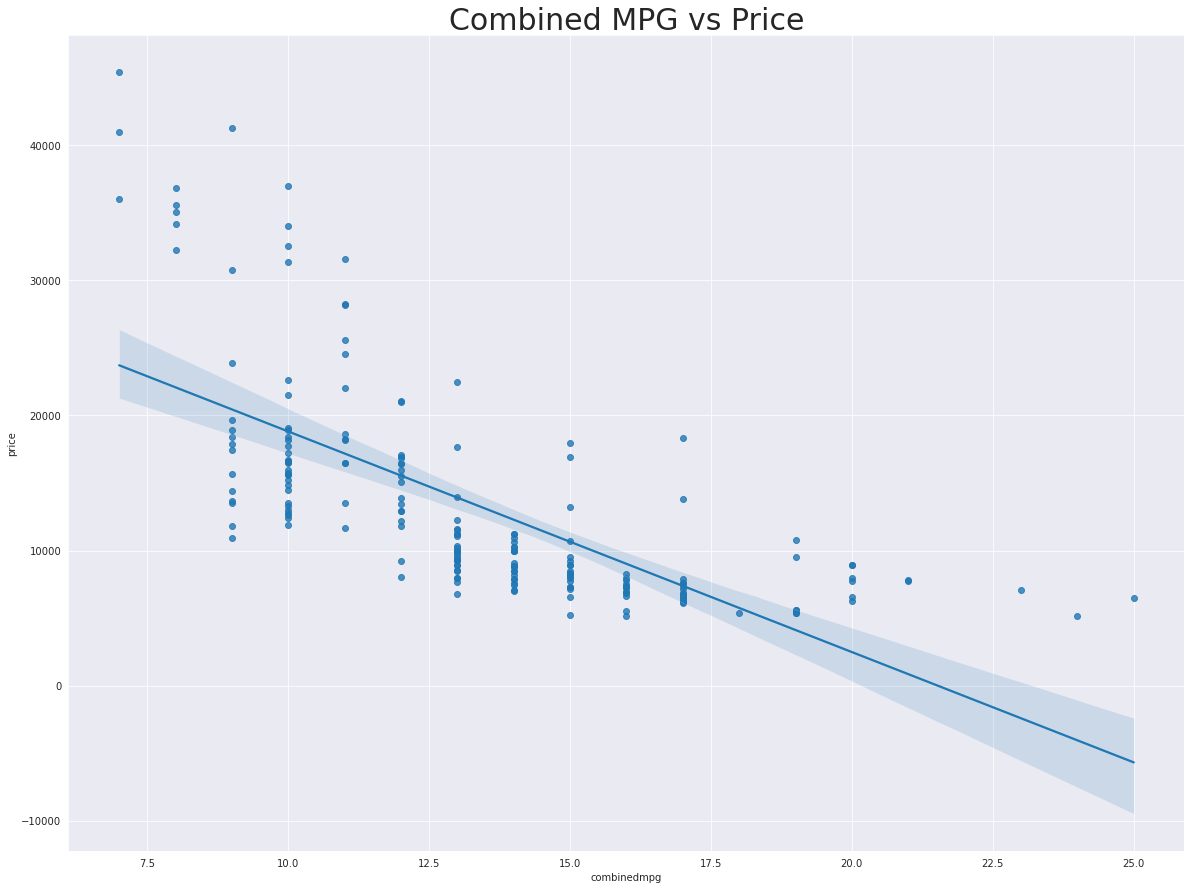

In [25]:
#plot showing relationship between fuel economy and price
plt.figure(figsize=(20,15))
plt.title('Combined MPG vs Price', size=30)
sns.regplot(x=train.combinedmpg, y=train.price)

* This plot corroborates that cars with more fuel economy are cheaper.
* Smaller engines mean more fuel economy, cheaper cars and more car sales.

<AxesSubplot:>

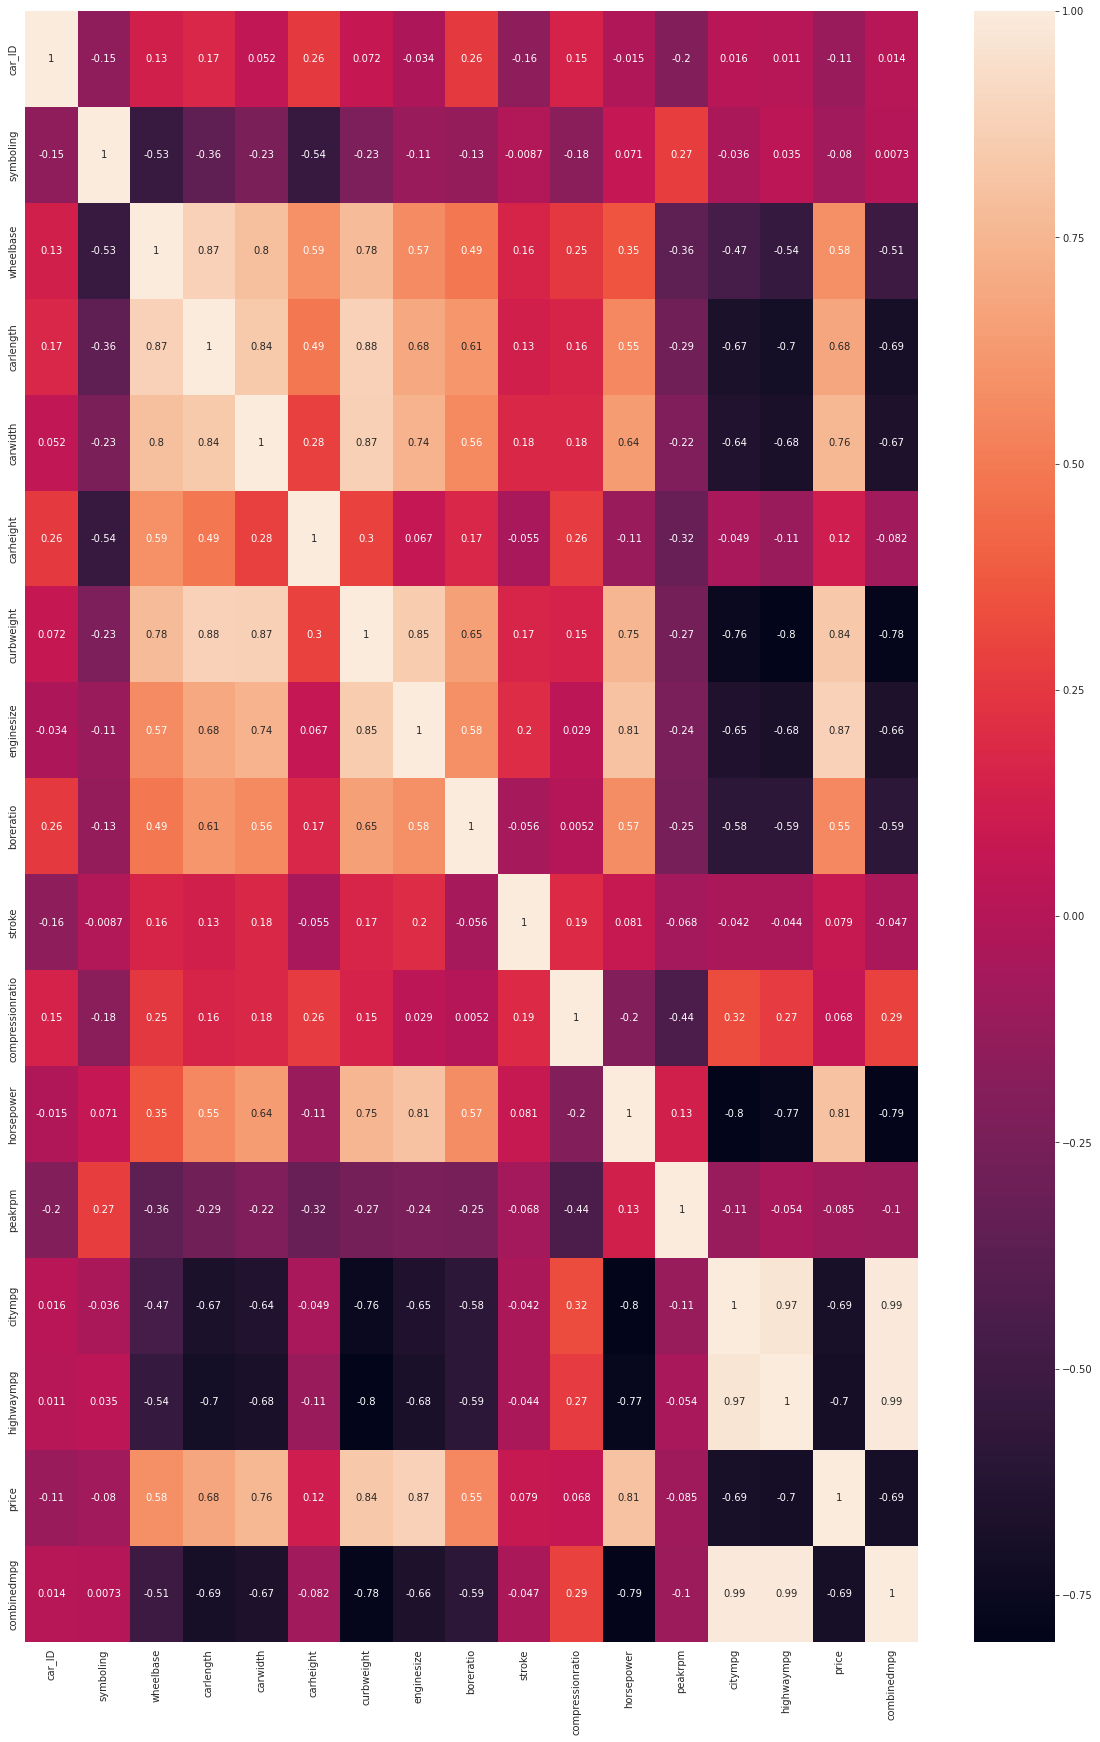

In [26]:
#correlation matrix to see features to select
plt.figure(figsize=(20,30))
sns.heatmap(train.corr(), annot=True)

* Heatmap further confirms the features that are more important in building our prediction model

## Feature Engineering

In [27]:
#Selecting our variables for the models
X = train.drop(columns=['CarName', 'price', 'car_ID', 'carheight', 'stroke', 'compressionratio', 'peakrpm'])
y = train.price

### Label Encoding

In [28]:
#init labelencoder
from sklearn.preprocessing import LabelEncoder
Lencoder = LabelEncoder()

In [29]:
#loop to encode only object  types
for col in X.select_dtypes(include='object').columns:
    X[col] = Lencoder.fit_transform(X[col])

X.dtypes

symboling           int64
fueltype            int64
aspiration          int64
doornumber          int64
carbody             int64
drivewheel          int64
enginelocation      int64
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype          int64
cylindernumber      int64
enginesize          int64
fuelsystem          int64
boreratio         float64
horsepower          int64
citympg             int64
highwaympg          int64
make                int64
combinedmpg         int64
dtype: object

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=5) #Splitting the data into training and testing sets

### Importing Model Metrics Tools

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error

## Linear Models

### LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression, ElasticNet, ARDRegression, QuantileRegressor, Lasso, Ridge

In [34]:
LReg = LinearRegression() 
LReg.fit(X_train, y_train)

LinearRegression()

In [35]:
LReg_pred = LReg.predict(X_test)
LReg_pred

array([ 3293.80088356,  7963.41519481, 16761.799482  , 30115.21223164,
        7458.84098117, 15175.8958472 , 20467.11946765,  8265.7538243 ,
        8470.47404913,  7147.40731301,  5965.53660597,  8265.7538243 ,
        5011.65514126, 13747.12450276, 10845.22580178,  7551.67592966,
       15561.27684734, 32965.81020209,  6793.8631083 ,  5831.89026   ,
        4968.11709135, 11304.19132566, 11337.50603851, 18609.10333665,
       11642.74413207, 12636.45781059, 14918.77894413,  4473.87583875,
       16606.75844689,  7382.82313701,  8294.3464745 ,  5942.42674784,
       14608.02288711, 12687.29400328, 10723.4142013 ,  6089.92204428,
       10965.67773615, 29914.95828365, 35261.14713076,  6889.82727401,
        9822.68858958, 15058.10022319,  7734.46551089,  6303.38619399,
       15182.95379641, 19701.68340439, 16732.03463434,  8554.08748495,
       36005.84686005, 16594.59275178,  7402.24076812,  7396.18363489,
       10965.67773615,  8971.82123987,  8046.80626982, 14656.26696908,
      

In [36]:
r2_score(y_test, LReg_pred)

0.8747484123875847

In [37]:
mean_absolute_error(y_test, LReg_pred)

2058.9973398333814

In [38]:
max_error(y_test, LReg_pred)

9394.153139945272

<AxesSubplot:xlabel='price'>

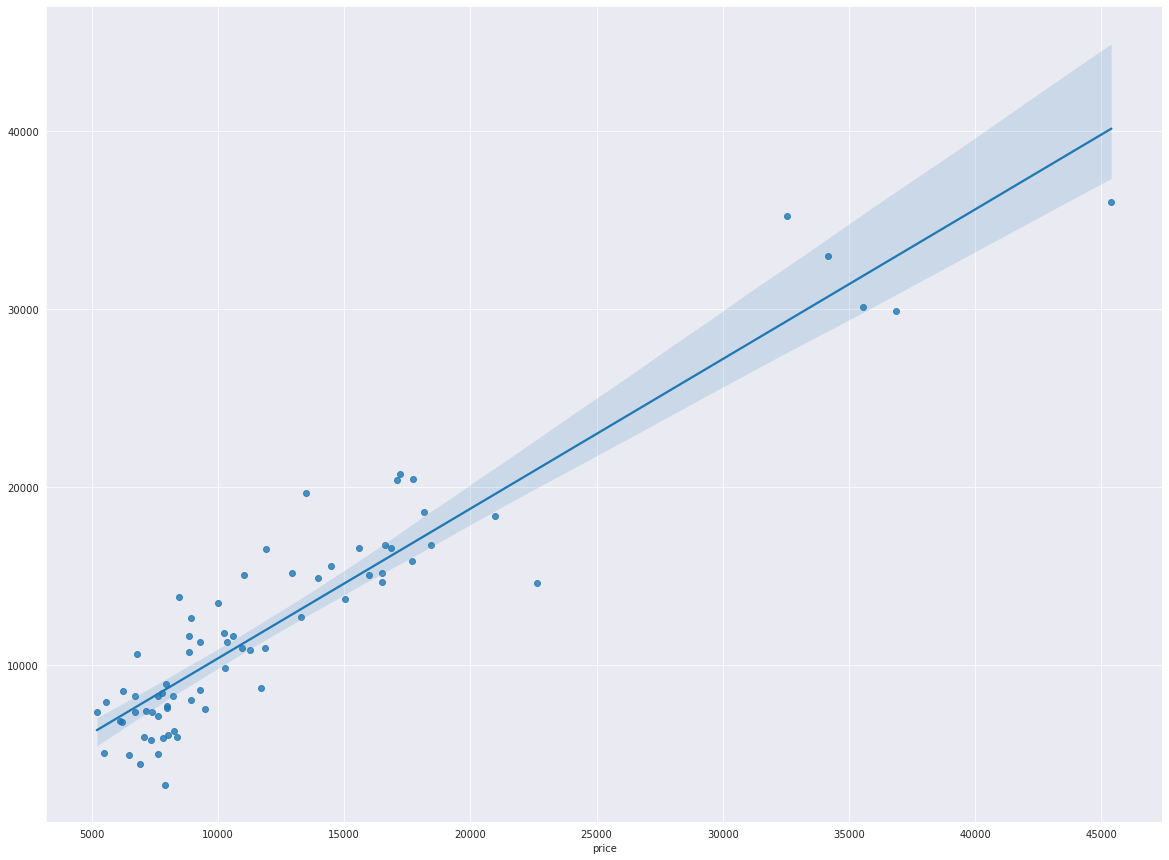

In [39]:
plt.figure(figsize=(20,15))
sns.regplot(y_test, LReg_pred)

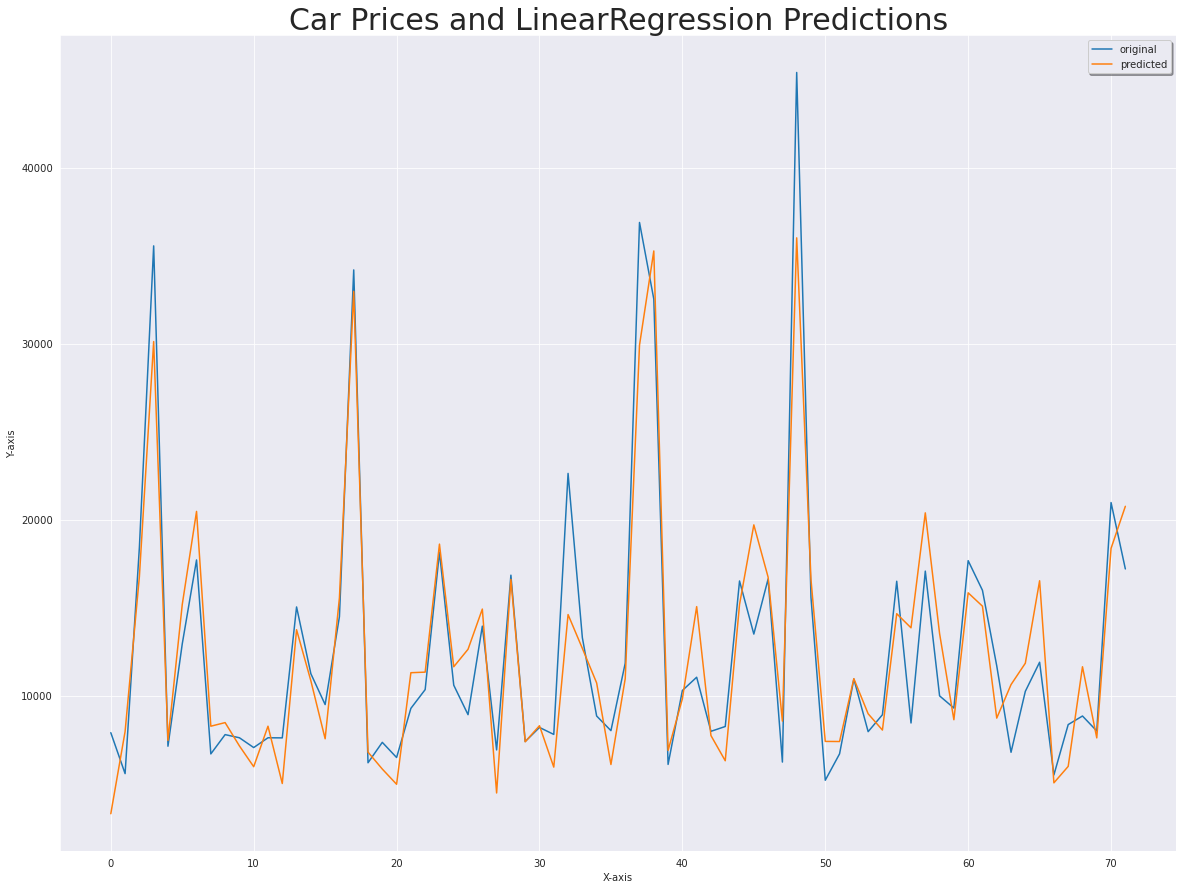

In [40]:
plt.figure(figsize=(20,15))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, LReg_pred, label="predicted")
plt.title("Car Prices and LinearRegression Predictions", size=30)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

### Lasso Regression

In [41]:
Lasso = Lasso()

In [42]:
Lasso.fit(X_train, y_train)

Lasso()

In [43]:
Lassopred = Lasso.predict(X_test)
Lassopred

array([ 3297.93175831,  7961.2299941 , 16772.45758308, 30134.01928672,
        7456.08389092, 15193.69258835, 20453.41019459,  8245.19635047,
        8460.82956373,  7131.84732232,  5974.65041192,  8245.19635047,
        5032.43180044, 13704.18298206, 10852.70304692,  7536.9389964 ,
       15590.47288883, 32938.65776001,  6782.05639227,  5837.32413994,
        4953.52777746, 11298.69328422, 11344.37705184, 18615.04772753,
       11660.03487756, 12639.53123859, 14897.6957613 ,  4479.12679974,
       16616.66034474,  7369.5625913 ,  8274.12236072,  5962.78173715,
       14644.35840557, 12668.53980333, 10732.07373752,  6120.14035248,
       10973.79982342, 29919.0775798 , 35193.24070413,  6885.43525869,
        9834.21092455, 15049.71787271,  7725.40547484,  6320.99892957,
       15199.83701075, 19708.68852989, 16723.49955821,  8536.00149063,
       36010.95627335, 16586.61406426,  7383.14033106,  7380.68945724,
       10973.79982342,  8977.59499152,  8033.09198722, 14676.56545579,
      

In [44]:
r2_score(y_test, Lassopred)

0.8751807457827576

<AxesSubplot:xlabel='price'>

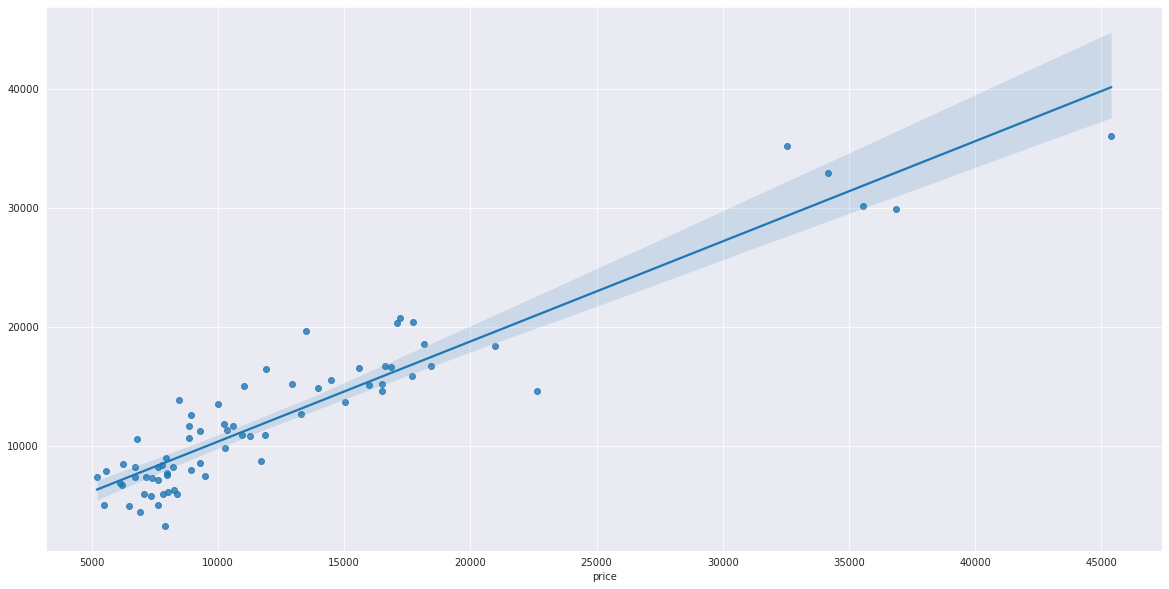

In [78]:
plt.figure(figsize=(20,10))
sns.regplot(y_test, Lassopred)

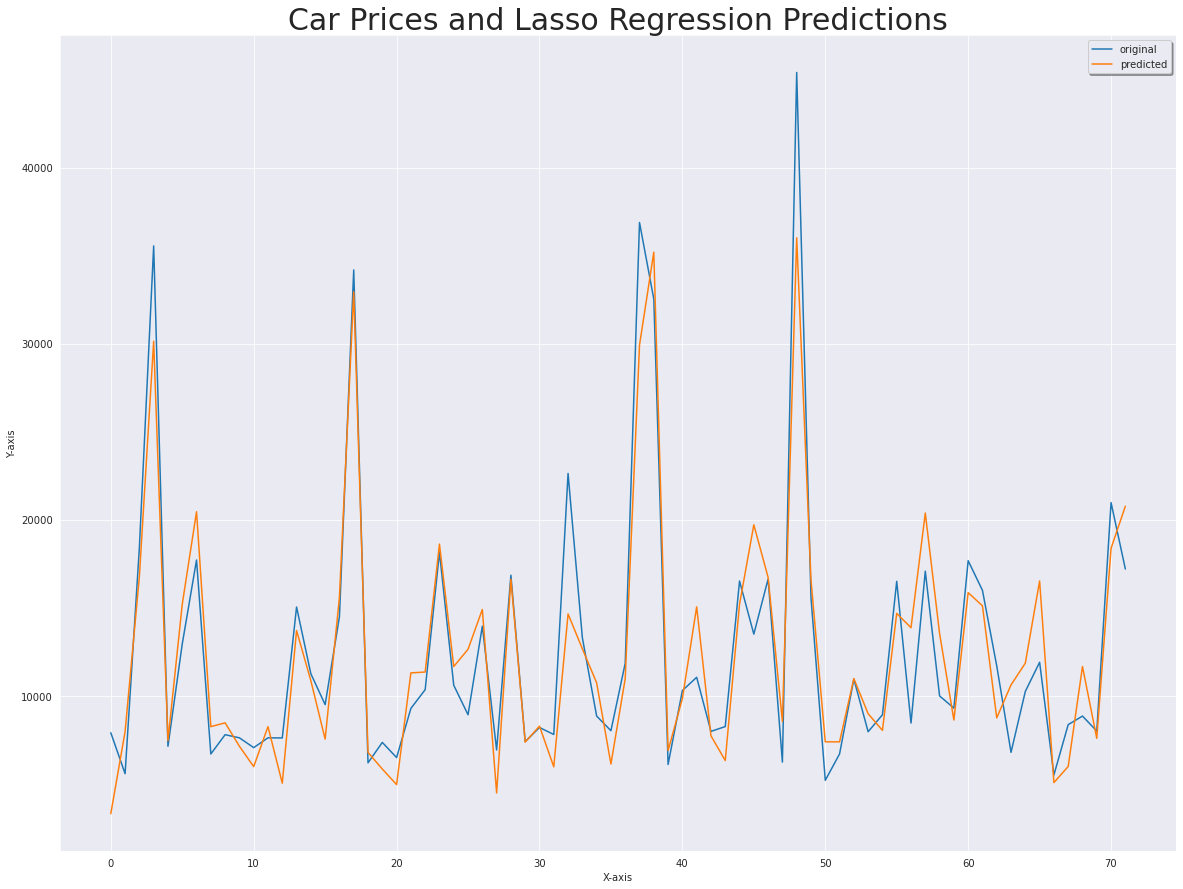

In [45]:
plt.figure(figsize=(20,15))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, Lassopred, label="predicted")
plt.title("Car Prices and Lasso Regression Predictions", size = 30)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

### Ridge Regression

In [46]:
Rid = Ridge()

In [47]:
Rid.fit(X_train, y_train)

Ridge()

In [48]:
Ridpred = Rid.predict(X_test)
Ridpred

array([ 3120.30990338,  7820.66750187, 17284.67628906, 29928.6860548 ,
        7266.81504096, 15213.50871571, 19525.21168497,  8153.79767548,
        9026.17094665,  7304.24548351,  6220.8021284 ,  8153.79767548,
        5182.4943227 , 13716.65733239, 10776.85536013,  7868.89057797,
       15989.38171364, 32685.92523469,  6594.87583164,  5947.42470246,
        5241.82195012, 11420.17820713, 11078.04229467, 18504.49334078,
       11516.43333563, 12483.23381124, 14764.22881189,  4463.53306034,
       16274.38161812,  7444.51921335,  8197.83695418,  6169.2491795 ,
       14366.66752287, 12573.00456507, 10975.38880441,  6115.96002563,
       11133.56927371, 29856.51740005, 31068.46878428,  6720.6910552 ,
       10693.62670112, 14749.45325875,  7305.57805039,  6792.97722957,
       15024.21736487, 20334.39093185, 15970.60545831,  8714.99964321,
       36463.96422357, 15809.26625172,  6986.51655057,  7446.06295007,
       11133.56927371,  8949.58771435,  7967.86432021, 15328.91684015,
      

In [49]:
r2_score(y_test, Ridpred)

0.8759787660996965

<AxesSubplot:xlabel='price'>

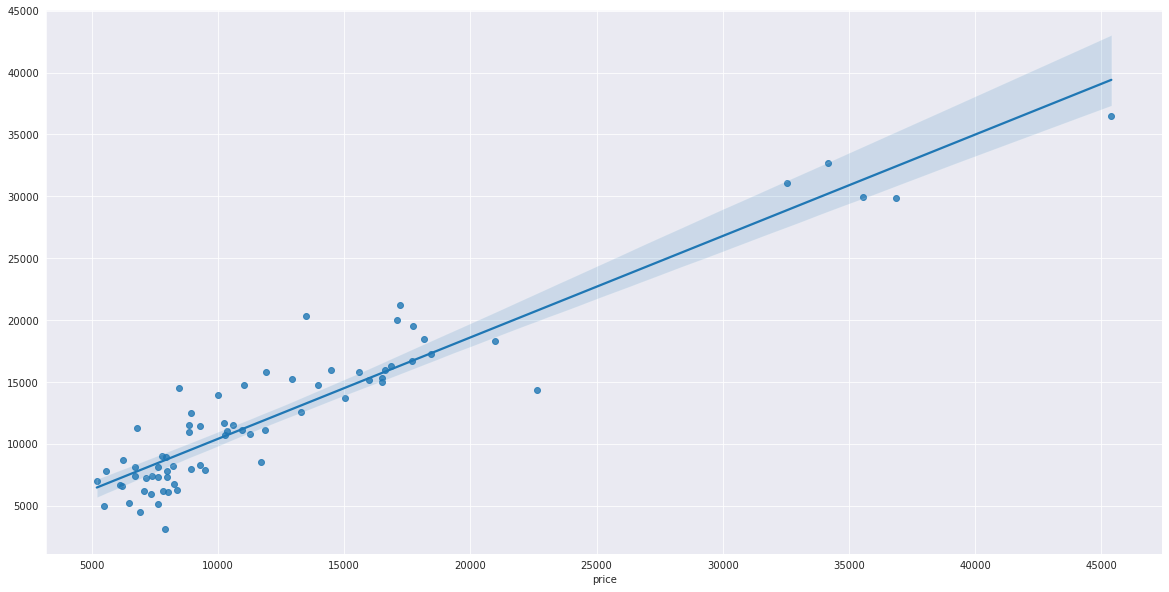

In [77]:
plt.figure(figsize=(20,10))
sns.regplot(y_test, Ridpred)

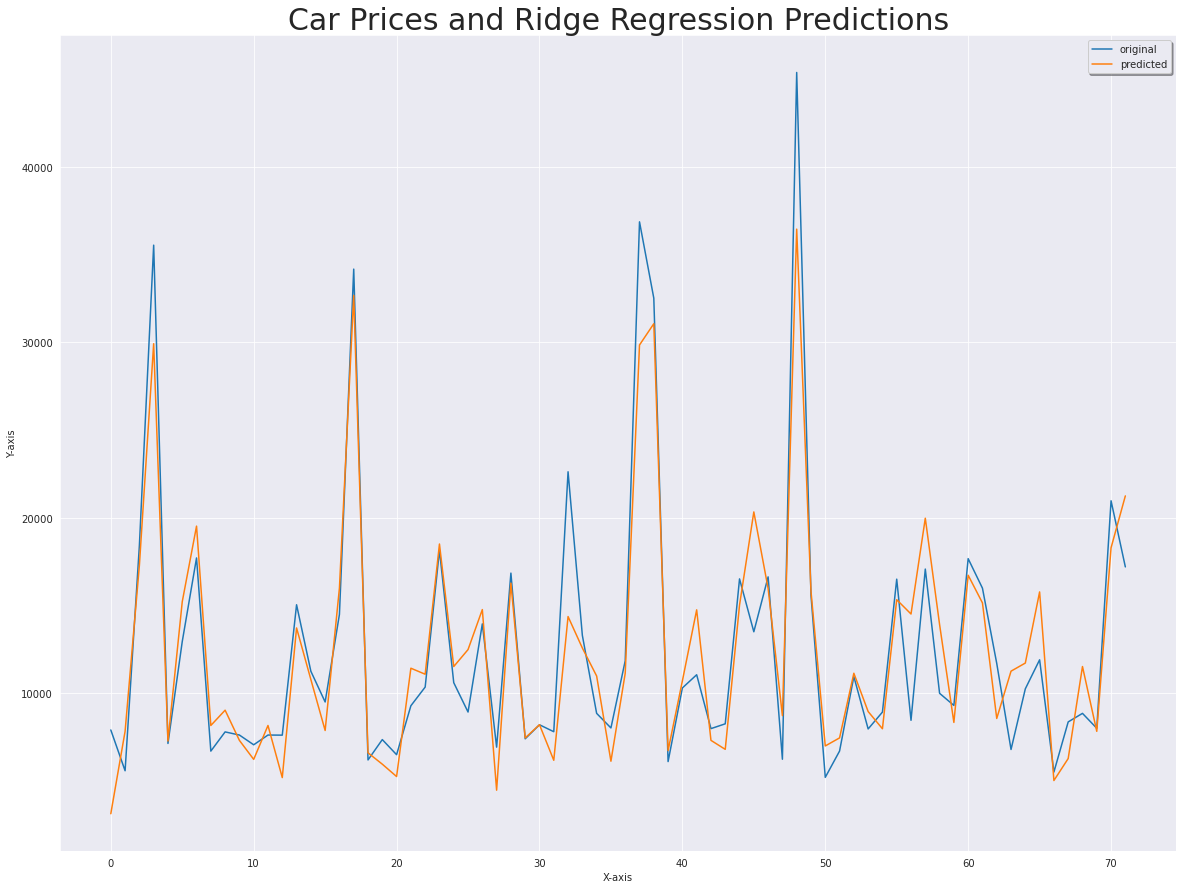

In [50]:
plt.figure(figsize=(20,15))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, Ridpred, label="predicted")
plt.title("Car Prices and Ridge Regression Predictions", size = 30)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

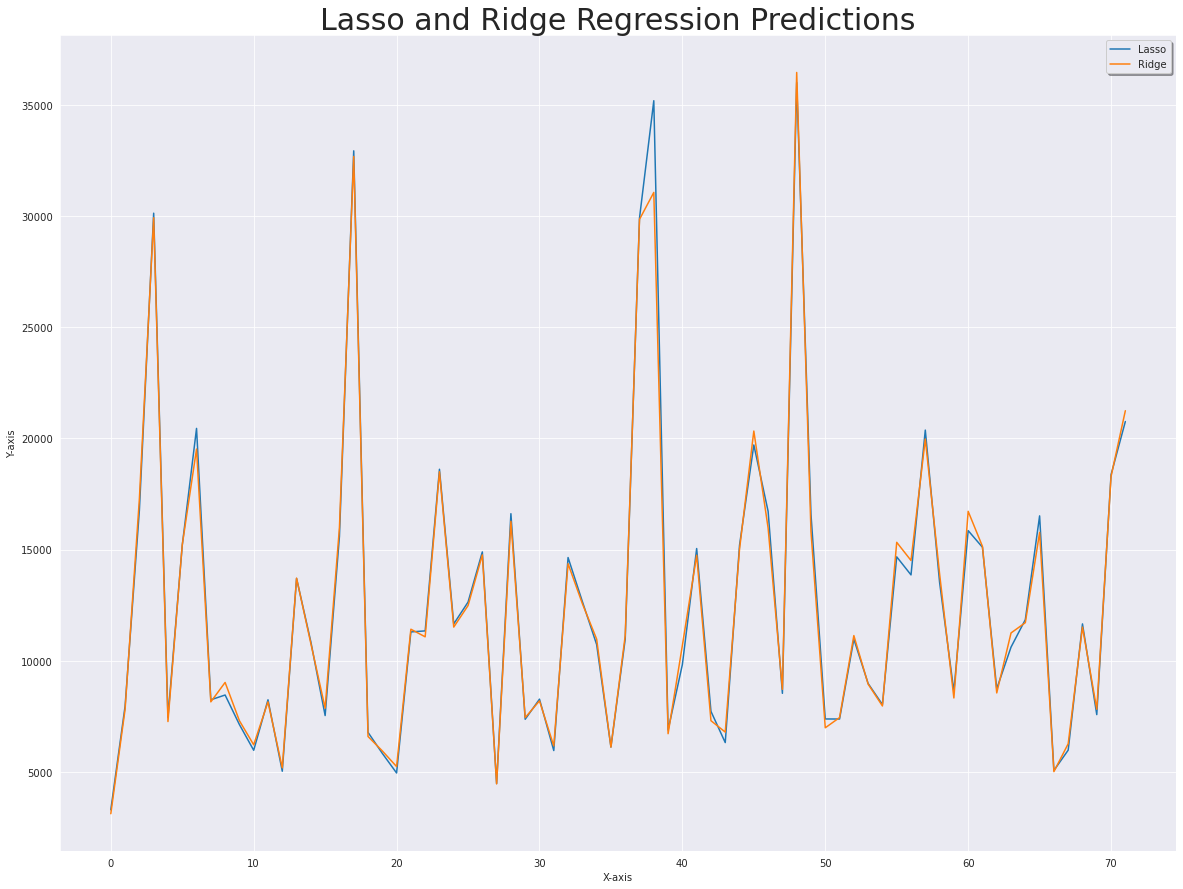

In [51]:
plt.figure(figsize=(20,15))
x_ax = range(len(y_test))
plt.plot(x_ax, Lassopred, label="Lasso")
plt.plot(x_ax, Ridpred, label="Ridge")
plt.title("Lasso and Ridge Regression Predictions", size = 30)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

### ElasticNet

In [52]:
el_net = ElasticNet()

In [53]:
el_net.fit(X_train,y_train)

ElasticNet()

In [54]:
el_pred = el_net.predict(X_test)
el_pred

array([ 4362.34251457,  7684.93509832, 17486.58491021, 31835.05343904,
        7111.72673409, 15056.21307482, 18792.02647458,  7413.40705285,
        8017.90414765,  7225.61882033,  6292.86799376,  7413.40705285,
        6307.76744366, 13562.91304644, 10826.9336636 ,  7634.48976539,
       18136.40986599, 31418.17769766,  6477.52530116,  6580.89487406,
        4795.65752868, 11994.7968995 , 11634.76418668, 18674.52004583,
       12196.09016412, 12712.74440017, 13741.2935253 ,  5311.25055845,
       15806.84393199,  6989.98112564,  7865.35127804,  7111.72013367,
       15644.48488495, 12178.27506572, 11323.75004165,  7721.44256601,
       10328.09464305, 29925.41860861, 23710.06745498,  6660.57708118,
       11332.42192693, 13701.62569773,  7726.17014703,  7418.75988093,
       15185.14905225, 21195.39182084, 14810.46680713,  7781.2790617 ,
       36927.41275058, 14671.11484991,  5873.49488455,  6967.13597387,
       10328.09464305,  9755.1789566 ,  7335.68896607, 15160.49197454,
      

In [55]:
r2_score(y_test, el_pred)

0.8725177972362052

In [56]:
mean_absolute_error(y_test, el_pred)

2010.2514100912865

In [57]:
(mean_squared_error(y_test, el_pred)) ** 0.5 #Root Mean Squared Error

2814.1478082062004

In [58]:
max_error(y_test, el_pred)

8817.932545017014

<AxesSubplot:xlabel='price'>

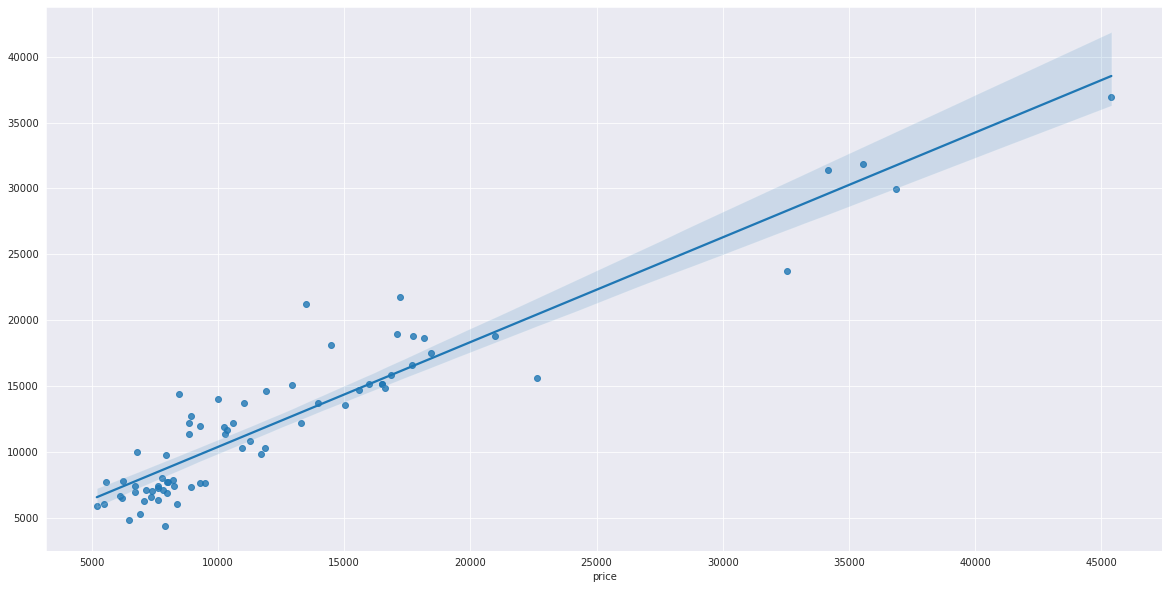

In [59]:
plt.figure(figsize=(20,10))
sns.regplot(y_test, el_pred)

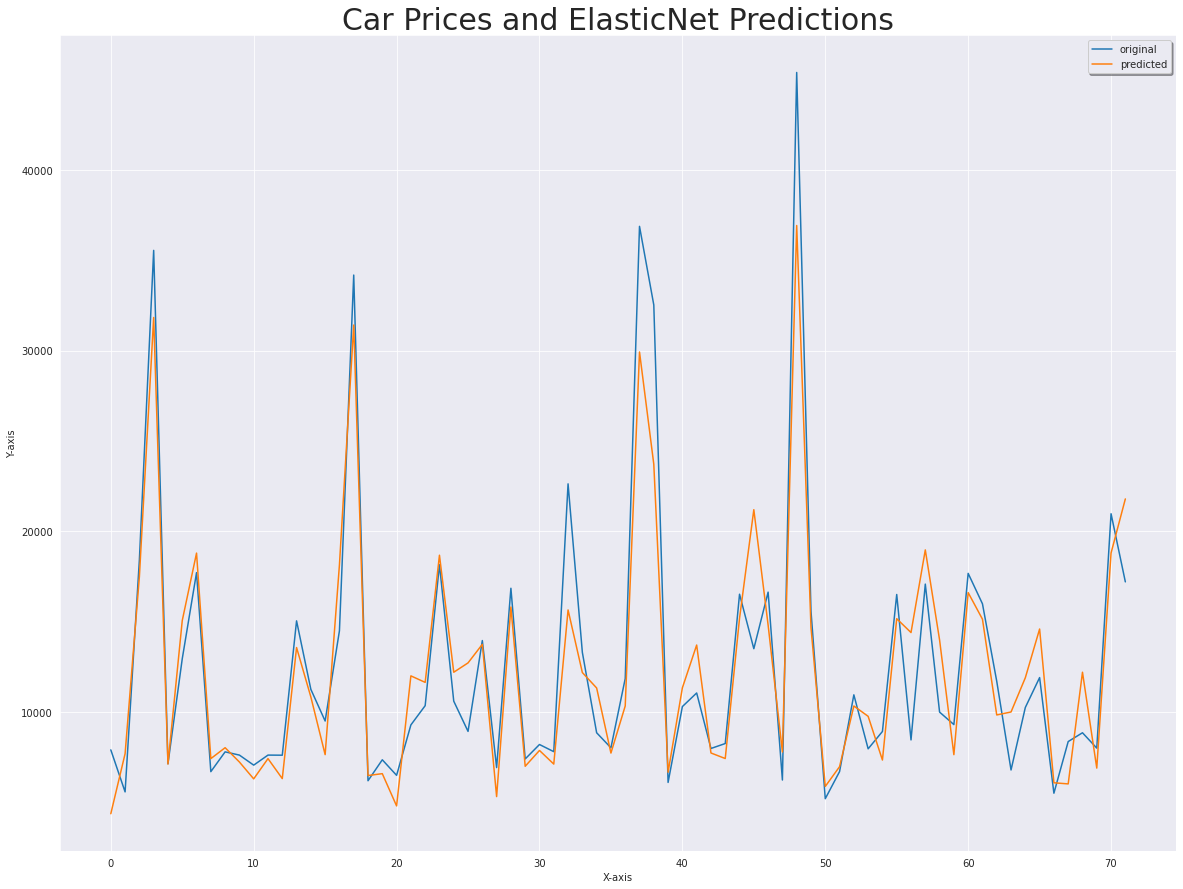

In [60]:
plt.figure(figsize=(20,15))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, el_pred, label="predicted")
plt.title("Car Prices and ElasticNet Predictions", size = 30)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

### ARDRegression

In [61]:
ARDReg = ARDRegression()

In [62]:
ARDReg.fit(X_train, y_train)

ARDRegression()

In [63]:
ARDpred = ARDReg.predict(X_test)
ARDpred

array([ 4130.71865297,  7427.02260391, 16417.7098202 , 31501.05784175,
        7949.85323191, 15207.92680724, 21111.9107231 ,  7840.73055237,
        6782.1115957 ,  6894.14929369,  6167.01218046,  7840.73055237,
        5384.79592741, 12392.69179943, 10600.8597032 ,  7262.09902901,
       17001.77303591, 31401.12540839,  6860.57855124,  6720.64741869,
        4501.47696369, 11430.76333697, 12229.104149  , 19096.81517784,
       12423.98066767, 12514.36630908, 13699.72421017,  5471.69206612,
       16680.62702283,  7138.41508398,  7886.45775751,  6735.28746962,
       17083.35051352, 12564.03081789, 11281.02223054,  7526.21457882,
       11114.92802509, 29653.51934507, 35193.8041466 ,  6955.34980953,
        9423.58861519, 14537.46976673,  7875.47367202,  6662.06203939,
       15683.87592682, 18924.25549209, 17133.23530666,  7760.18542428,
       35645.34300055, 17081.20014857,  6918.73575255,  7120.10932932,
       11114.92802509,  9616.76287349,  6984.14187897, 15679.64583662,
      

In [64]:
r2_score(y_test, ARDpred)

0.8829276089820002

In [65]:
mean_absolute_error(y_test, ARDpred)

2063.9810073688122

In [66]:
max_error(y_test, ARDpred)

9754.656999453618

In [67]:
np.sqrt(mean_squared_error(y_test, ARDpred))

2696.803907943633

<AxesSubplot:xlabel='price'>

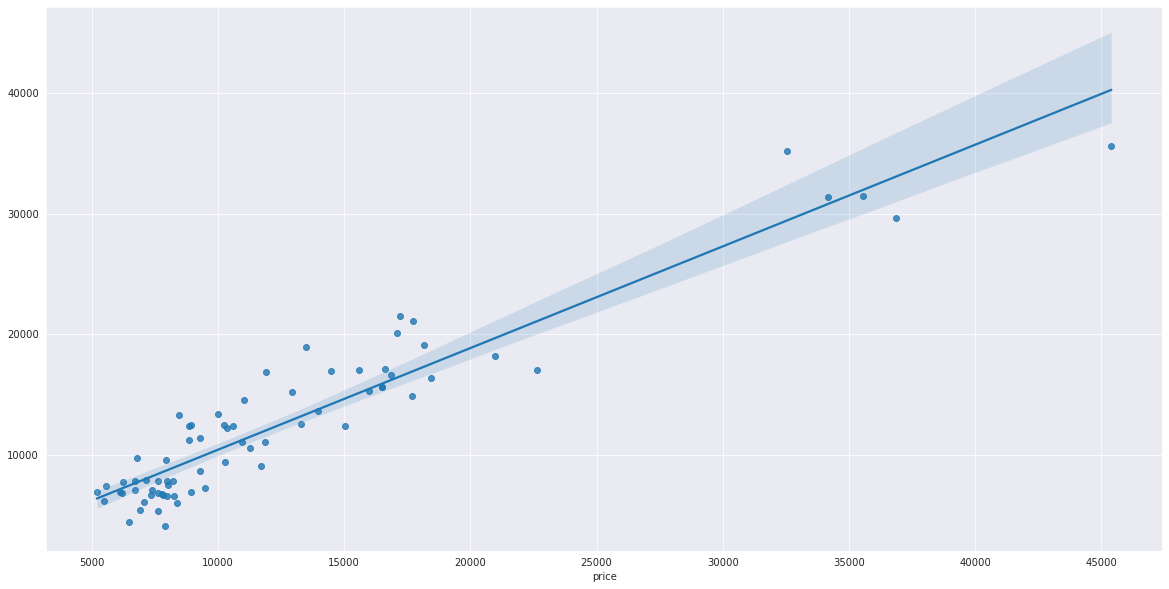

In [68]:
plt.figure(figsize=(20,10))
sns.regplot(y_test, ARDpred)

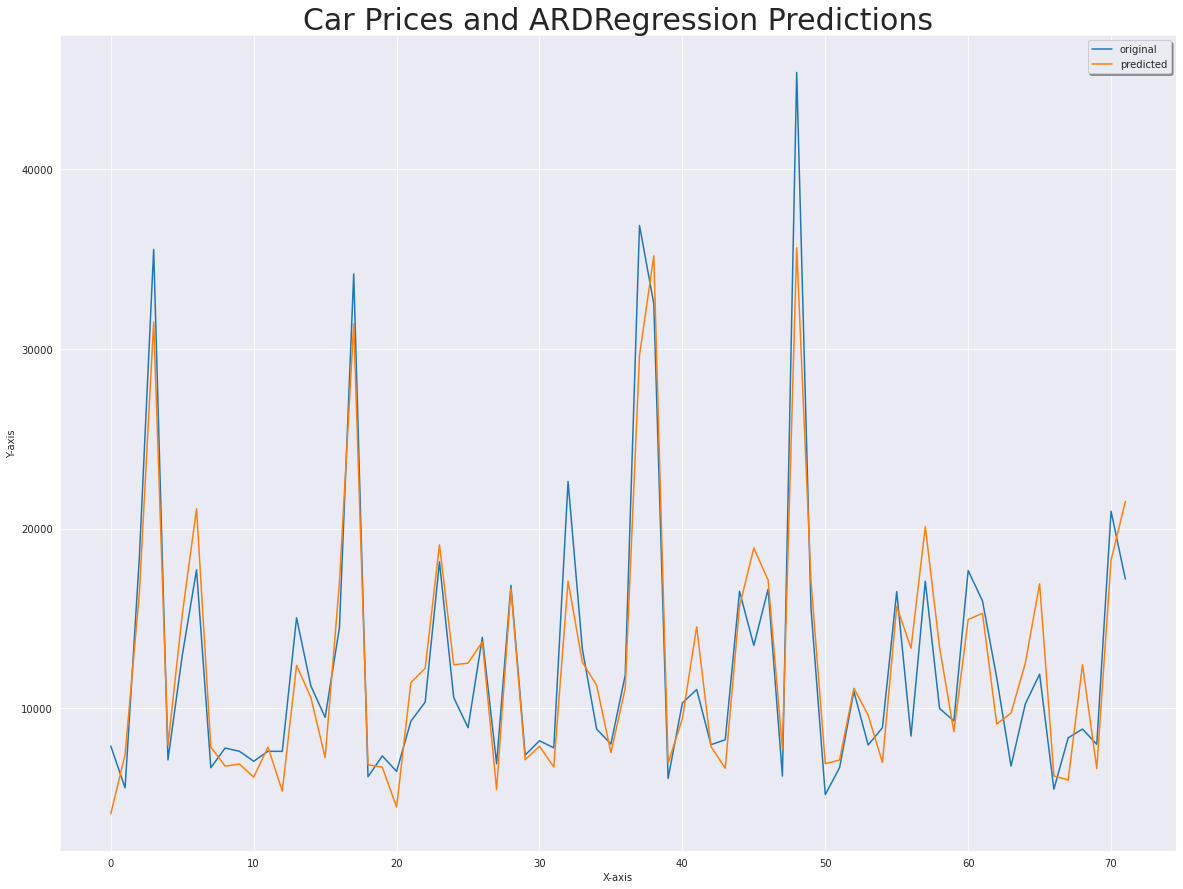

In [69]:
plt.figure(figsize=(20,15))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ARDpred, label="predicted")
plt.title("Car Prices and ARDRegression Predictions", size=30)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

### QuantileRegressor

In [70]:
qt = QuantileRegressor()

In [71]:
qt.fit(X_train, y_train)

QuantileRegressor()

In [72]:
qt_pred = qt.predict(X_test)
qt_pred

array([ 7989.30221022,  5855.81062056, 17235.28896881, 30964.71091872,
        6640.32240532, 15712.82309246, 15499.3936782 ,  6562.69615321,
        8666.64971755,  7980.36036276,  8068.08586166,  6562.69615321,
        8818.76076282, 13408.96644   , 11373.74177251,  8557.1026815 ,
       17673.75782847, 27280.8620498 ,  6211.95059195,  6967.76395014,
        6269.00556144, 11269.52259717, 10305.79331055, 17679.10031048,
       10994.77490338, 12152.87049372, 10725.53799216,  7926.74596795,
       15963.04805889,  6255.37237221,  8952.1727243 ,  6992.78644681,
       16651.16671873, 13808.68363233, 10007.73812245, 10180.61622012,
        8726.90311411, 25257.59370933, 20080.04382027,  5942.59116351,
       10433.12056699, 13237.94778014,  8933.40585165,  6867.6739633 ,
       16526.05423532, 20175.11781893, 15433.72831007,  6425.07242129,
       31494.89604449, 15381.31873094,  5880.03492214,  6224.09425133,
        8726.90311411,  8735.81769694,  6057.18939511, 13393.19671258,
      

In [73]:
y_test

154     7898.0
21      5572.0
198    18420.0
48     35550.0
34      7129.0
194    12940.0
6      17710.0
25      6692.0
159     7788.0
122     7609.0
139     7053.0
26      7609.0
140     7603.0
134    15040.0
177    11248.0
187     9495.0
84     14489.0
71     34184.0
77      6189.0
93      7349.0
152     6488.0
87      9279.0
42     10345.0
117    18150.0
61     10595.0
28      8921.0
3      13950.0
153     6918.0
200    16845.0
54      7395.0
185     8195.0
95      7799.0
204    22625.0
191    13295.0
39      8845.0
148     8013.0
56     11845.0
17     36880.0
126    32528.0
51      6095.0
40     10295.0
46     11048.0
183     7975.0
98      8249.0
197    16515.0
101    13499.0
115    16630.0
24      6229.0
74     45400.0
111    15580.0
50      5195.0
53      6695.0
55     10945.0
23      7957.0
45      8916.5
1      16500.0
167     8449.0
114    17075.0
169     9989.0
165     9298.0
172    17669.0
196    15985.0
149    11694.0
43      6785.0
62     10245.0
107    11900.0
89      54

In [74]:
r2_score(y_test, qt_pred)

0.8093510386843893

<AxesSubplot:xlabel='price'>

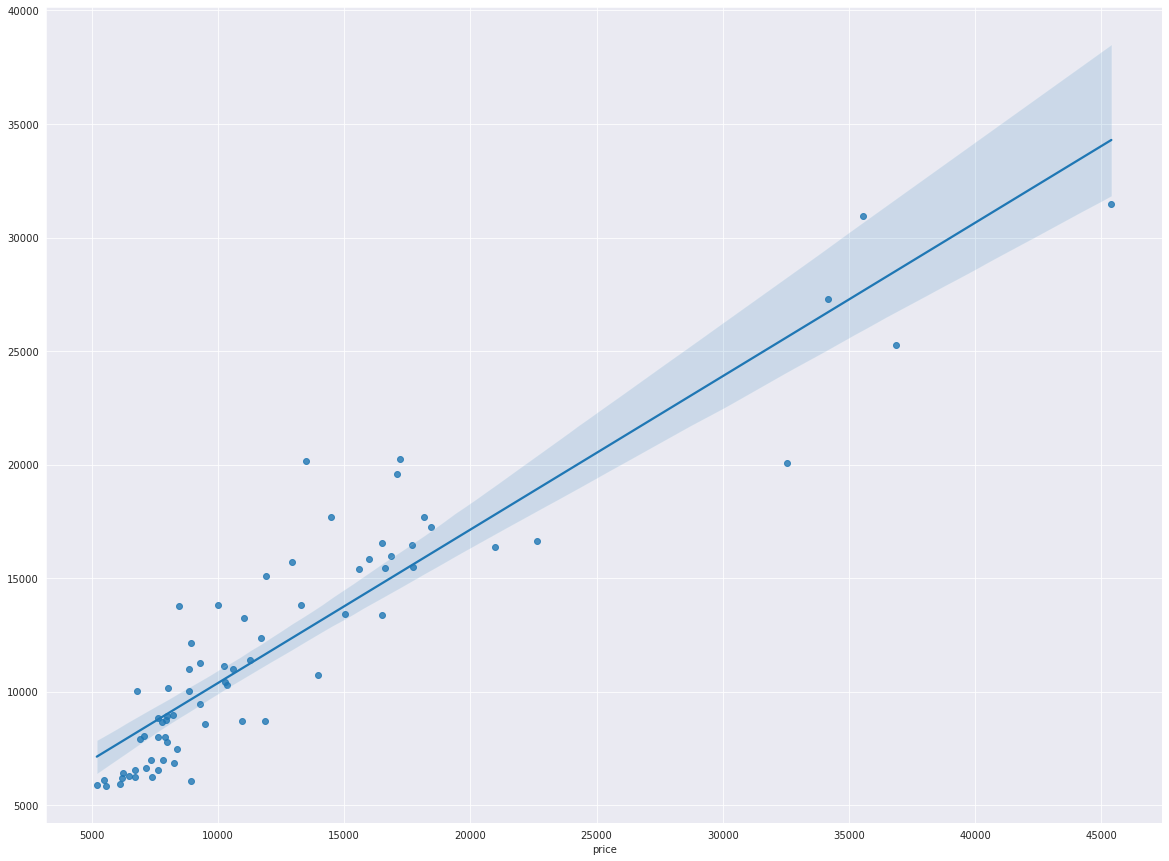

In [75]:
plt.figure(figsize=(20,15))
sns.regplot(y_test, qt_pred)

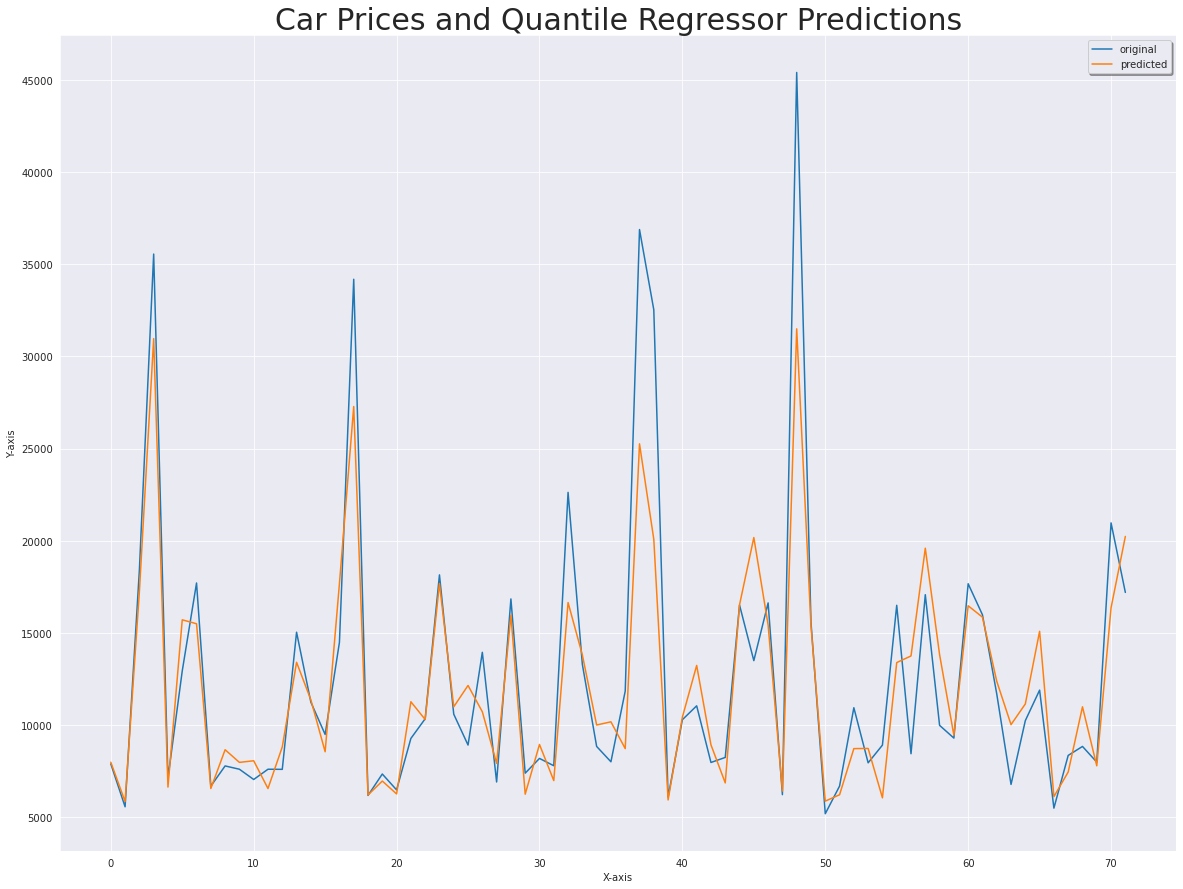

In [76]:
plt.figure(figsize=(20,15))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, qt_pred, label="predicted")
plt.title("Car Prices and Quantile Regressor Predictions", size=30)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)

plt.grid(True)
plt.show()  